# Table of Contents
- **[Arrays & Hashing](#arrays)**
- **[Two Pointers](#pointers)**
- **[Stack](#stack)**
- **[Sliding Window](#slidingwindow)**
- **[Binary Search](#binarysearch)**
- **[Linked List](#linkedlist)**
- **[Trees](#trees)**
- **[Tries](#tries)**
- **[Heap / Priority Queue](#heappriority)**

## Arrays & Hashing <a name="arrays"></a>

### 217. Contains Duplicate 

In [ ]:
class Solution:
    def containsDuplicate(self, nums: List[int]) -> bool:
        return not len(set(nums)) == len(nums)

### 242. Valid Anagram

In [2]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        for char in s:
            if t == '':
                return False
            t = t.replace(char, '', 1)
        if t != '':
            return False
        return True

### 1. Two Sum

In [ ]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        for i in range(len(nums)):
            for j in range(i + 1, len(nums)):
                if nums[i] + nums[j] == target:
                    return [i, j]

### 49. Group Anagrams

#### My Initial Solution:

In [ ]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        if len(s) != len(t):
            return False
        for char in s:
            if not list(s).count(char) == list(t).count(char):
                return False
        return True

    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        dict = {}
        for string in strs:
            addedToDict = False
            for key in dict.keys():
                if self.isAnagram(string, key):
                    arr = dict[key]
                    arr.append(string)
                    dict[key] = arr
                    addedToDict = True
            if not addedToDict:
                dict[string] = [string]
        return list(dict.values())

- The problem with this code is that very large sets don't run quickly enough.
- I am looking for ways to improve performance for that reason.
- Looking at the solution video it seems you have to use a dict with keys being the character count, i.e. {a:2, c:1, d:1} and values being a list of words matching that pattern.

#### Improved Solution:

In [ ]:
class Solution:
    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        res = defaultdict(list)

        for string in strs:
            count = [0] * 26

            for c in string:
                count[ord(c) - ord('a')] += 1

            res[tuple(count)].append(string)

        return res.values()

- The way this works is, we create a list `count` for each string, which holds 26 fields, representing the frequency of the lowercase letters of the alphabet. 
- Then we go through the characters of each string and populate `count`. For example the string `cab` would result in `[1,1,1,0,0,...]`
- This will then be used as the key in the `res` dictionary, where we append the string to the corresponding list of values.
- These values are then returned as the result.
- An intuitive way to think about this, is that we are using histograms as keys, and lists of values fitting the pattern of the histogram, as values.

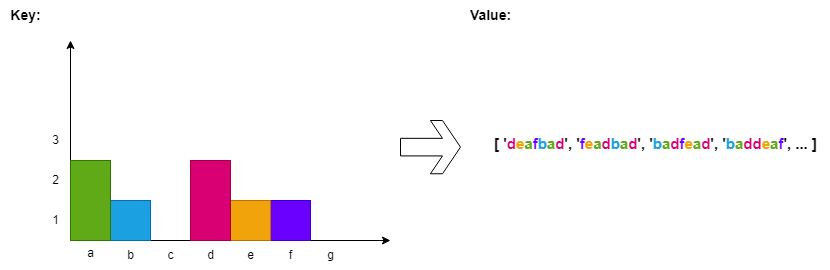

### 347. Top K Frequent Elements

In [ ]:
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        counter = dict(Counter(nums))
        counter = dict(sorted(counter.items(), key=lambda item: item[1]))
        counterList = list(reversed(list(counter.keys())))
        res = []
        for i in range(k):
            res.append(counterList[i])
        return res

- My thought process here was to use the `Counter` object from python to count the occurences of each number in `nums`, and return the `k` most frequent numbers.
- To retrieve the most frequent numbers, I sorted the `counter` dictionary by it's values (ascending), extracted the keys as `counterList`, reversed `counterList` for a descending ordering, and returned the `k` first keys.

### 238. Product of Array Except Self

#### My Initial Solution:

In [ ]:
class Solution:
    def prod(self, nums: List[int]) -> int:
        prod = 1
        for i in range(len(nums)):
            prod = prod * nums[i]
        return prod
        
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        res = [0] * len(nums)
        for i in range(len(nums)):
            if nums[i] != 0:
                res[i] = int(self.prod(nums) / nums[i])
            elif nums[i] == 0:
                temp = nums.copy()
                nums.pop(i) 
                res[i] = self.prod(nums)
                nums = temp
        return res

- Technically this works, but it is highly inefficient because each product is calculated by moving through the whole list, which results in a complexity of O(n^2).

#### Improved Solution:

In [ ]:
class Solution:
    #step 1: save the product for each unique number in a dict
    #step 2: go through nums and for each number paste the corresponding value of the dict into the result array 
    def prod(self, nums: List[int]) -> int:
        prod = 1
        for i in range(len(nums)):
            prod = prod * nums[i]
        return prod

    def productExceptSelf(self, nums: List[int]) -> List[int]:
        unique = list(set(nums))
        uniqueDict = defaultdict(int)
        for num in unique:
            temp = nums.copy()
            nums.remove(num)
            uniqueDict[num] = self.prod(nums)
            nums = temp 
        res = [0] * len(nums)
        for count, num in enumerate(nums):
            res[count] = uniqueDict[num]
        return res

- What I have done to drastically improve the performance and reduce the complexity to O(n), was to first retrieve all unique values inside of `nums`, and save them inside of `unique`.
- Then I created a dictionary `uniqueDict`, which would hold the product corresponding to each of the unique numbers.
- Lastly I went through `nums` and populated the `res` list with the matching dictionary entries for each `num` in `nums`.

### 36. Valid Sudoku

In [ ]:
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        # Step 1 validate rows
        valid = range(1, 10)
        isValid = True
        for i in range(len(board)):
            row = [int(val) for val in board[i] if val != "."]
            print(row)
            if not sorted(row) == sorted(list(set(row))):
                isValid = False
            for val in row:
                if not val in valid:
                    isValid = False
        print(f'rows are {isValid}')
        # Step 2 validate cols
        colCount = 0
        while colCount < len(board):
            col = []
            for i in range(len(board)):
                col.append(board[i][colCount])
            col = [int(val) for val in col if val != "."]
            print(col)
            if not sorted(col) == sorted(list(set(col))):
                isValid = False
            for val in col:
                if not val in valid:
                    isValid = False
            colCount += 1
        print(f'cols are {isValid}')
        # Step 3 validate blocks
        layer = 0
        block = 0
        for i in range(len(board)):
            vals = []
            if block == 9:
                block = 0
                layer += 3
            for j in range(3):
                for i in range(3):
                    vals.append(board[block + j][layer + i])
            vals = [int(val) for val in vals if val != "."]
            print(vals)
            if not sorted(vals) == sorted(list(set(vals))):
                isValid = False
            for val in vals:
                if not val in valid:
                    isValid = False
            block += 3
        print(f'blocks are {isValid}')
        return isValid

- This task was pretty straightforward. I went through it in three distinct steps.
- First, I extracted the rows of the board, and validated them by making sure that each `row` only contains unique values from 1 to 9.
- The second and third step follow the exact same pattern, although I had to put some more effort into properly indexing the blocks in step three.

### 271. Encode and Decode Strings

#### Provisional Solution:

In [ ]:
class Solution:
    def encode(self, strs: List[str]) -> str:
        res = ''
        for i, string in enumerate(strs):
            if i != len(strs) - 1:
                res = res + string + ':;'
            else:
                res = res + string
        return res
    
    def decode(self, str) -> List[str]:
        strs = str.join(':;')
        return strs

- Due to this being a problem that requires leetcode premium, I am unable to check whether my solution would be accepted.
- For now I will leave this solution here, but it is definitely subject to change and likely will not pass the tests.

### 128. Longest Consecutive Sequence

In [ ]:
class Solution:
    def longestConsecutive(self, nums: List[int]) -> int:
        if nums == []:
            return 0
        s_nums = sorted(list(set(nums)))
        count = 1
        res = 1
        for i in range(len(s_nums) - 1):
            if s_nums[i] == s_nums[i+1] - 1:
                count += 1
                if i == len(s_nums) - 2 and count > res:
                    res = count
            else:
                if count > res:
                    res = count
                count = 1
        return res

- To solve this problem, I first converted `nums` into a sorted and unique list `s_nums`. 
- Similarly to finding the maximum value in a list, I traversed `s_nums` and saved the state of the longest sequence of elements increasing by steps of one, inside of `res`.

## Two Pointers <a name="pointers"></a>

### 125. Valid Palindrome

In [ ]:
class Solution:
    def isPalindrome(self, s: str) -> bool:
        s = re.sub(r'\W', '', s)
        s = s.lower()
        s = s.replace('_', '')
        if s == '':
            return True
        print(s)
        half = int(len(s) / 2)
        print(f'len {len(s)} half {half}')
        for i in range(half):
            print(f'comparing {s[i]} : {s[len(s) - 1 - i]}')
            if s[i] != s[len(s) - 1 - i]:
                return False
        return True

- As the description of this task mentions, a String is a palindrome when its reduction to alphanumeric and lowercase letters, reads the same forward and backward.
- To this end, I have used a regular expression and the `lower()` method to convert `s` into the desired format.
- Lastly, I iterated through `half` the length of `s`, starting with one pointer at the end of `s` and another pointer at the start of `s`, and compared their characters.

### 167. Two Sum II - Input Array Is Sorted

In [ ]:
class Solution:
    def twoSum(self, numbers: List[int], target: int) -> List[int]:
        for i, num in enumerate(numbers):
            if i < len(numbers) - 2 and num == numbers[i+2]:  
                continue
            for j in range(i+1, len(numbers)):
                if num + numbers[j] == target:
                    print(f'target reached with {i}, {j}')
                    return [i+1,j+1]
                elif num + numbers[j] > target:
                    break

- The way I approached this problem, was to iterate through every `num` in `numbers`, and for every `num`, to iterate over all subsequent numbers, until either the target is reached, or the sum is greater than the `target`.
- To avoid unnecessary calculations of sums, the inner loop breaks as soon as the sum is greater than `target`.
- I had to add another conditional check at the start of the outer loop, to further increase performance for large inputs.
- The first check will ensure that we avoid entering the inner loop, as long as there are more than two subsequent numbers with the same value.
- Both breaking out of the loop and the first conditional only work because the list is sorted.

### 15. 3Sum

#### My Initial Solution:

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res = []
        for i in range(len(nums)):
            for j in range(i+1, len(nums)):
                for k in range(j+1, len(nums)):
                    if nums[i] + nums[j] + nums[k] == 0:
                        arr = sorted([nums[i],nums[j],nums[k]])
                        if not arr in res:
                            res.append(arr)
        return res

- This works, but it is quite inefficient and therefore exceeds the time limit on larger inputs.
- I have to think about a way of reducing the time complexity of my solution from O(n^3) to something smaller.

#### Another Solution:

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        if list(set(nums)) == [0]:
            return [[0,0,0]]
        res = []
        if nums.count(0) >= 3:
            res.append([0,0,0])
        flag = 0 in nums
        nums = [num for num in nums if num != 0]
        if flag:
            nums.append(0)
        s_nums = sorted(nums)
        if len(s_nums) == 3 and abs(s_nums[0]) == s_nums[2] and s_nums[1] == 0:
            return [s_nums]
        print(f'sorted nums: {s_nums}')
        # Step 1: Two pointers on the elements leftmost of 0 and one on the rightmost element
        right = len(nums) - 1
        while(s_nums[right] > 0):
            if s_nums[0] >= 0 or s_nums[1] >= 0:
                break
            if abs(s_nums[right]) > abs(s_nums[0] + s_nums[1]):
                right -= 1
                continue
            for i in range(len(s_nums)):
                if s_nums[i] == 0:
                    break
                for j in range(i+1, len(s_nums)):
                    if s_nums[j] > 0:
                        break
                    if abs(s_nums[i] + s_nums[j]) < s_nums[right]:
                        break
                    elif abs(s_nums[i] + s_nums[j]) == s_nums[right]:
                        arr = sorted([s_nums[i], s_nums[j], s_nums[right]])
                        if not arr in res:
                            res.append(arr)
            right -= 1
        print(f'res after starting with two pointers on the left of 0: {res}')
        # Step 2: Two pointers on the elements rightmost of 0 and one on the leftmost element
        left = 0
        while(s_nums[left] < 0):
            if s_nums[len(nums) - 2] <= 0 or s_nums[len(nums) - 1] <= 0:
                break
            if abs(s_nums[left]) > abs(s_nums[len(nums) - 2] + s_nums[len(nums) - 1]):
                left += 1
                continue
            for i in reversed(range(len(s_nums))):
                if s_nums[i] == 0:
                    break
                for j in reversed(range(i)):
                    if s_nums[j] < 0:
                        break
                    if s_nums[i] + s_nums[j] < abs(s_nums[left]):
                        break
                    elif s_nums[i] + s_nums[j] == abs(s_nums[left]):
                        arr = sorted([s_nums[i], s_nums[j], s_nums[left]])
                        if not arr in res:
                            res.append(arr)
            left += 1
        print(f'res after starting with two pointers on the right of 0: {res}')
        return res

- This solution is a bit faster than my first solution, but it is still not fast enough to pass the tests for large inputs.
- In this solution I am handling a few edge cases at the beginning of the code, and then traverse the sorted `s_nums`.
- In the first `while` loop I placed two pointers on the negative half of the sorted array, and compare their absolute sum to the rightmost element. 
- When no combination of two negative values has yielded the positive element on the right, I decrease the rightmost pointer by one, and try to match it with combinations of negative values again. 
- The same process is repeated in the next `while` loop, starting with two pointers to the rightmost elements.

#### Yet Another Solution:

In [ ]:
class Solution:
    def twoSum(self, numbers: List[int], target: int, solutions: List[list]) -> List[int]:
        for i, num in enumerate(numbers):
            if i < len(numbers) - 2 and num == numbers[i+2]:  
                continue
            for j in range(i+1, len(numbers)):
                if num + numbers[j] == target and not [num, numbers[j], -target] in solutions:
                    return [numbers[i],numbers[j]]
                elif num + numbers[j] > target:
                    break
        return None
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res = []
        solutions = defaultdict(list)
        s_nums = sorted(nums)
        unique_s_nums = sorted(list(set(s_nums)))
        for i in range(len(unique_s_nums)):
            fixed = unique_s_nums[i]
            temp = s_nums.copy()
            s_nums.remove(fixed)
            ts = []
            while not ts is None:
                ts = self.twoSum(s_nums, -fixed, solutions[fixed])
                if not ts is None:
                    ts.append(fixed)
                    solutions[fixed].append(ts)
                    arr = sorted(ts)
                    if not arr in res:
                        res.append(arr)
            s_nums = temp
        return res

- Looking at the hints, it became clear that you are supposed to reduce the problem to a two sum, by fixing one value at a time.
- I iterated through the unique values in `nums` via `unique_s_nums`, and for each value `fixed`, I retrieved all possible two sums via the helper function `twoSum`.
- It is still not efficient enough to pass with large inputs.

#### Improved Solution:

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res = []
        s_nums = sorted(nums)

        for i, num in enumerate(s_nums):
            if i > 0 and s_nums[i-1] == s_nums[i]:
                continue
            left, right = i+1, len(s_nums)-1
            while left < right:
                s = num + s_nums[left] + s_nums[right]
                if s > 0:
                    right -= 1
                    continue
                elif s < 0:
                    left += 1
                    continue
                elif s == 0:
                    res.append([num, s_nums[left], s_nums[right]])
                    left += 1
                    while s_nums[left-1] == s_nums[left] and left < right:
                        left += 1
        return res

- After coding out another inefficient solution which I have not included here, I decided to check out the solution.
- The way it works is that we first sort `nums` and save it in `s_nums`, then we iterate through `s_nums`, skipping duplicate elements, and for each number we find the matching two sums in the remainder of `s_nums` to the right.
- The two sums in the remaining list can be found by placing a pointer `left` on the leftmost element and a pointer `right` on the rightmost element, and moving the pointers closer together until all matching two sums have been found.
- More specifically, when the current sum `s` is greater than `0`, we move the `right` pointer inward, and when `s` is less than `0`, we move the `left` pointer inward.

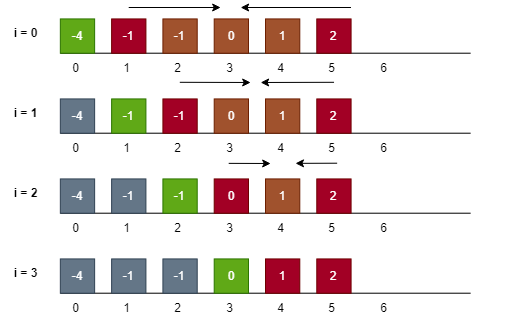

### 11. Container With Most Water

#### My Initial Solution:

In [ ]:
class Solution:
    def area(self, i: int, j: int, height: List[int]) -> int:
        return min(height[i], height[j]) * (j - i)

    def maxArea(self, height: List[int]) -> int:
        res = 0
        for i in range(len(height)):
            for j in range(i+1, len(height)):
                ar = self.area(i, j, height)
                if ar > res:
                    res = ar
        return res

- This does return the correct results, but it is not efficient enough on larger inputs.
- I have to find a way to reduce the time complexity from O(n^2), because as is, I am calculating the area for all possible tuples.

#### Improved Solution:

In [ ]:
class Solution:
    def area(self, i: int, j: int, height: List[int]) -> int:
        return min(height[i], height[j]) * (j - i)

    def maxArea(self, height: List[int]) -> int:
        res = 0
        left = 0
        right = len(height) - 1
        while(abs(left-right) > 1):
            ar = self.area(left, right, height)
            if ar > res:
                res = ar
            if height[left] <= height[right]:
                left += 1
            elif height[left] > height[right]:
                right -= 1
        ar = self.area(left, right, height)
        if ar > res:
            res = ar
        return res

- A hint I received on the page was *"Try to use two-pointers. Set one pointer to the left and one to the right of the array. Always move the pointer that points to the lower line."*
- Thanks to this hint, I was able to come up with a solution with time complexity O(n).
- The way it works is, `left` is an index to the leftmost element in `height` and `right` is an index to the rightmost element. We iterate through the elements in `height` until `left` and `right` are at a distance of 1 from each other.
- We calculate the area `ar` between `left` and `right` in each iteration, saving the state of the largest area in `res`.

### 42. Trapping Rain Water

In [ ]:
class Solution:
    def validate(self, block: int ,height: List[int]) -> tuple[bool, int]:
        remainder = height[block+2:len(height)]
        if remainder == []:
            return False, 0
        if height[block] > height[block+1] and height[block+1] < max(remainder):
            #print(f'{height[block]} > {height[block+1]} and {height[block+1]} < {max(remainder)} => detected pool')
            return True, max(remainder)
        #print(f'{height[block]} > {height[block+1]} and {height[block+1]} < {max(remainder)} => continue')
        return False, 0

    def trap(self, height: List[int]) -> int:
        left,right = 0,1
        res = 0
        
        while left < len(height):
            #print(f'left: {left} right: {right}')
            loop, highest = self.validate(left, height)
            if loop:
                #print(f'pool height: {min(highest, height[left])}')
                while height[right] < min(highest, height[left]):
                    res += min(highest, height[left]) - height[right]
                    #print(f'res = {min(highest, height[left])} - {height[right]} = {res}')
                    right += 1
                left = right
                right += 1
            else:
                left += 1
                right += 1
        return res

- We iterate over `height` with two pointers `left` and `right`, starting on the first and second element respectively.
- I had to write a helper function, `validate`, that will check two conditions to decide whether an element in the iteration should be skipped or not. If an element is skipped, `left` and `right` move one position further to the right.
- The first condition is that the height of `left` is greater than the height of `right`.
- The second condition is that the largest value `highest` in the remaining list to the right of `right`, called `remainder`, is greater than the height of `right`.
- In the inner loop, we iterate over the *"pool"*, which has a height of the minimum of `highest`, and the height of `left`, and add the amount of *"water"* contained in the *"pool"* to `res`.

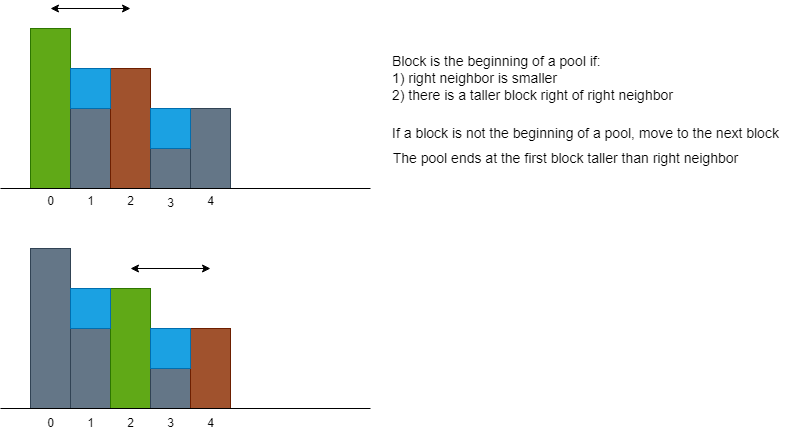

## Stack <a name="stack"></a>

### 20. Valid Parentheses

In [ ]:
class Solution:
    def isValid(self, s: str) -> bool:
        if len(s) % 2 != 0:
            return False
        stack = []
        for c in s:
            if c in '[{(':
                stack.append(c)
            elif c in '}])' and stack != []:
                t = stack.pop()
                if c == '}' and t != '{' or c == ')' and t != '(' or c == ']' and t != '[':
                    return False
            elif c in '}])' and stack == []:
                return False
        if stack != []:
            return False
        return True

- The solution here was pretty straightforward, although there were a couple of edge cases that I did not pay attention to at first.
- The way I implemented it was to iterate over the string `s` and push any opening parantheses onto the `stack`, and whenever there is a closing parantheses, it has to be the closing parantheses to the opening parantheses on top of the `stack`, which we retrieve with `pop()`.
- If there are still opening parantheses on the stack after iterating through `s`, or if there are closing parantheses while the `stack` is empty, `s` is not valid.

### 150. Evaluate Reverse Polish Notation 

In [ ]:
class Solution:
    def evalRPN(self, tokens: List[str]) -> int:
        stack = []
        for token in tokens:
            #print(f'token: {token} stack: {stack}')
            try:
                num = int(token)
                stack.append(num)
            except ValueError:
                num1 = stack.pop()
                num2 = stack.pop()
                if token == '+':
                    stack.append(num1 + num2)
                elif token == '*':
                    stack.append(num1 * num2)
                elif token == '-':
                    stack.append(num2 - num1)
                elif token == '/':
                    stack.append(int(num2 / num1))
        return stack.pop()

- This works by iterating over the list of `tokens` and pushing every number `num` onto the stack, and whenever we encounter an arithmetic operator, we pop the two elements on top of the stack, `num1` and `num2`, and push the result of the arithmetic operation back onto the stack.
- The last remaining value on the stack will be our return value.

### 155. Min Stack

In [ ]:
class MinStack:
    def __init__(self):
        self.s1 = []
        self.s2 = []

    def push(self, val: int) -> None:
        self.s1.append(val)
        if self.s2 == [] or self.s2 != [] and val <= self.s2[-1]:
            self.s2.append(val)
        #print(f'push: {self.s1}, {self.s2}')
        
    def pop(self) -> None:
        val = self.s1.pop()
        if val == self.s2[-1]:
            self.s2.pop()
        #print(f'pop: {self.s1}, {self.s2}')

    def top(self) -> int:
        #print(f'top: {self.s1}, {self.s2}')
        return self.s1[-1]

    def getMin(self) -> int:
        #print(f'getMin: {self.s1}, {self.s2}')
        return self.s2[-1]


# Your MinStack object will be instantiated and called as such:
# obj = MinStack()
# obj.push(val)
# obj.pop()
# param_3 = obj.top()
# param_4 = obj.getMin()

- I approached this problem by utilizing two stacks, `s1` and `s2`, where `s1` holds the actual values of the stack and `s2` saves information about the current minimum in `s1`.
- Whenever a value is pushed onto `s1` and the value is less or equal to the `top` element in `s2`, it will be pushed onto `s2` as the current minimum of `s1`.
- When an element is popped from `s1` and it is equal to the `top` element in `s2`, that means we are popping the current minimum of `s1`, and the element will also be popped from `s2`.

### 22. Generate Parantheses

#### My Initial Solution:

In [ ]:
class Solution:
    def isValid(self, s: str) -> bool:
        if len(s) % 2 != 0:
            return False
        stack = []
        for c in s:
            if c in '[{(':
                stack.append(c)
            elif c in '}])' and stack != []:
                t = stack.pop()
                if c == '}' and t != '{' or c == ')' and t != '(' or c == ']' and t != '[':
                    return False
            elif c in '}])' and stack == []:
                return False
        if stack != []:
            return False
        return True
    
    def kbits(self, n, k) -> list[str]:
        res = []
        for binary in itertools.combinations(range(n), k):
            s = [')'] * n
            for bit in binary:
                s[bit] = '('
            res.append(''.join(s))
        return res

    def generateParenthesis(self, n: int) -> List[str]:
        res = []
        pot = self.kbits(2*n, n)
        for p in pot:
            valid = self.isValid(p)
            if valid:
                res.append(p)
        return res

- I had a lot of difficulties figuring out a solution for this problem, and I am convinced that this is not the intended solution, but it was accepted nonetheless.
- How it works is that we generate all possible ways to pick `n` opening parantheses in a string of length `2n`, where the remaining elements will be closing parantheses.
- Then we reuse `isValid` from problem `20. Valid Parantheses`, to filter out all valid combinations of parantheses.

#### Improved Solution:

In [ ]:
class Solution:
    def bt(self, opened: int, closed: int, res: str, n: int, arr: list[str]) -> None:
        if closed > opened or opened > n or closed > n:
            # invalid solution / overshooting n
            return
        if closed == opened and closed == n:
            # print(f'appending {res} to {arr}')
            arr.append(res)
            return
        self.bt(opened+1, closed, res + '(', n, arr)
        self.bt(opened, closed+1, res + ')', n, arr)
    def generateParenthesis(self, n: int) -> List[str]:
        res = []
        self.bt(0,0,'',n,res)
        return res

- The intended Solution was to use backtracking with a cutoff condition of `closed > opened` and a result condition of `opened == closed == n`.
- I achieved this with the recursive function `bt`, which calls itself until it either reaches the cutoff condition or a valid result `res` has been found, which will be appended to `arr`, the list holding all valid results.


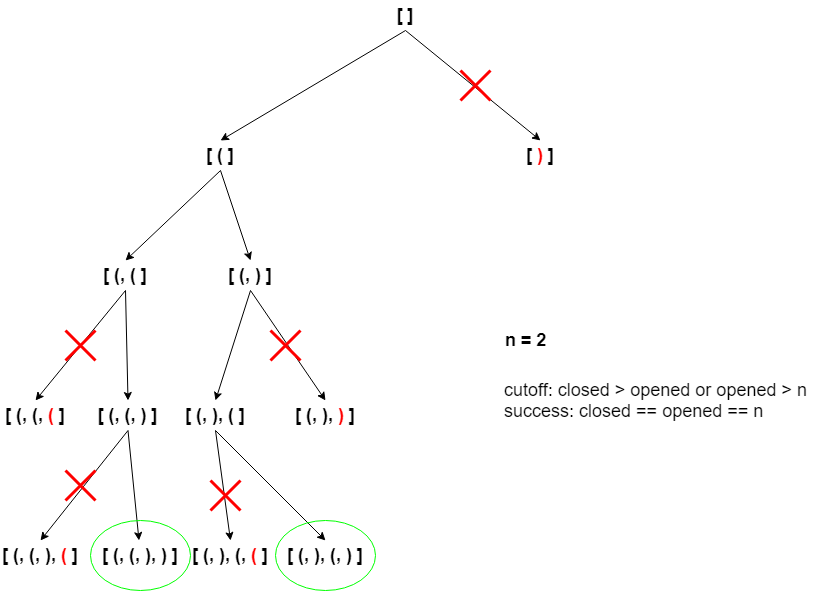

### 739. Daily Temperatures

#### My Initial Solution:

In [ ]:
class Solution:
    def dailyTemperatures(self, temperatures: List[int]) -> List[int]:
        res = [0] * len(temperatures) 
        d = defaultdict(int) # key: index val: [temp, dist]
        for i, curr in enumerate(temperatures):
            right = 0
            if i < len(temperatures)-1:
                right = temperatures[i+1]
            if right <= curr:
                d[i] = [curr, 1]
                for key, val in d.items():
                    if not i == key:
                        val[1] += 1
            elif right > curr:
                d[i] = [curr, 0]
                toPop = []
                for key, val in d.items():
                    val[1] += 1 
                    if val[0] < right:
                        res[key] = val[1]
                        toPop.append(key)
                for key in toPop:
                    d.pop(key)
            print(f'{curr}<{right}: {curr < right} d: {dict(d)}')
        return res

- This code does return the correct values, but it is not efficient enough on larger inputs.
- The way it works is that we iterate over `temperatures`, and whenever the `right` neighbor has a smaller or equal value, we increase the distance for each previous key in the dictionary `d` by one.
- When the value of `right` is larger, we remove all the key value pairs from `d` whose value is less than `right`.

#### Improved Solution: 

In [ ]:
class Solution:
    def dailyTemperatures(self, temperatures: List[int]) -> List[int]:
        stack = []
        res = [0] * len(temperatures)
        for i,temp in enumerate(temperatures):
            if not i == len(temperatures) - 1:
                right = temperatures[i+1]
                # right > curr
                if right > temp:
                    res[i] = 1
                    while stack != [] and stack[-1][0] < right:
                        top = stack.pop()
                        res[top[1]] = i+1 - top[1]
                # right <= curr
                else:
                    stack.append([temp, i])
                # print(f'c: {temp} r: {temperatures[i+1]} s: {stack} res: {res}')
        return res

- This time around, I have utilized a `stack` to reduce the time complexity to O(m*n), where `m` is the size of the stack and `n` is the length of `temperatures`.
- We iterate through `temperatures` and whenever our `right` neighbor is smaller, we push the current `temp` onto the stack along with its index `i`.
- Whenever we encounter a `right` neighbor that is larger, we `pop` from the `stack` and write the distance between the `top` element and `right` into `res`, until the `top` value is no longer smaller than `right`.
- To better understand how this works, I have created a graphic below.

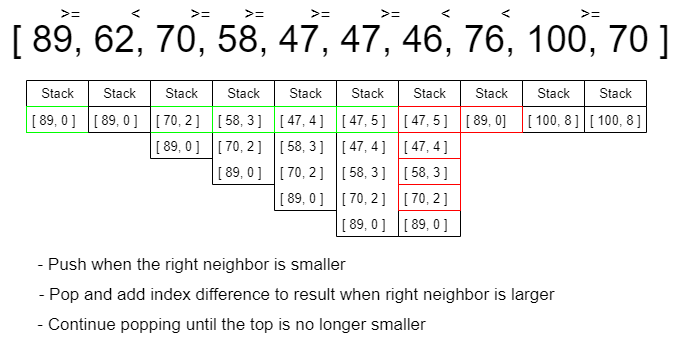

### 853. Car Fleet

In [ ]:
class Solution:
    def carFleet(self, target: int, position: List[int], speed: List[int]) -> int:
        # l holds tuples (pos, speed) sorted and in reverse order
        l = list(zip(position, speed))
        l.sort(key=lambda a: a[0])
        l = list(reversed(l))
        stack = []
        for car in l:
            stack.append(car)
            if len(stack) > 1:
                # if time to target of top <= time to target of previous top
                if (target - stack[-1][0]) / stack[-1][1] <= (target - stack[-2][0]) / stack[-2][1]:
                    stack.pop()
        return len(stack)

- This was probably the most difficult problem for me so far. After spending the whole day trying to come up with a solution, I looked at the intended solution and couldn't believe how ingenious it was.
- The way it works is that we create a list of tuples `l` combining `position` and `speed` of every car and sorting it by `position`, such that it represents the order of the cars on the racetrack.
- Then we traverse `l` in reverse order, starting with the car closest to the `target`.
- On every iteration, we push the current car onto the `stack`, and if there are at least two cars on the `stack`, we compare the time they require to reach the target, and if the current car requires less time to reach the `target`, it will be `popped` from the stack.
- This way, the length of the `stack` keeps track of the number of `fleets` there are, because when the current car requires less time to reach its `target`, it will bump into the previous car, which is the car ahead of it on the racetrack.
- What we are left with is a `stack` containing the leaders of the respective `fleets`

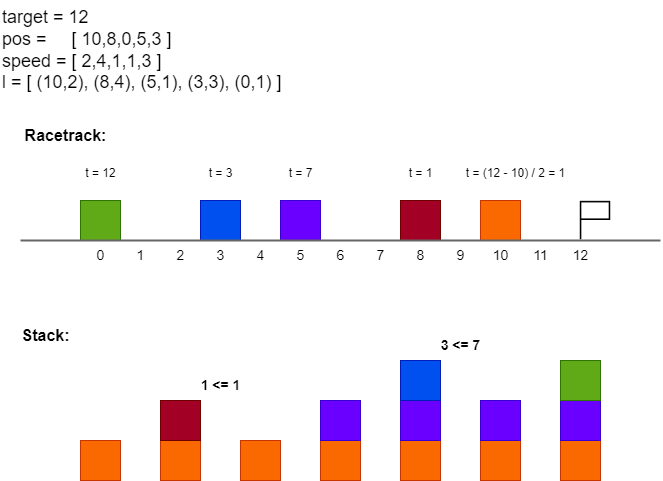

### 84. Largest Rectangle in Histogram

In [ ]:
class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        maxAr = 0
        stack = []
        pushed = False
        for i, h in enumerate(heights):
            if not pushed:
                stack.append([i, h])
            else:
                pushed = False
            # curr > right
            if i < len(heights)-1 and heights[i+1] < h:
                # pop from stack until top no longer greater than right
                index = 0
                while stack != []:
                    top = stack.pop()
                    area = (i+1 - top[0]) * top[1]
                    if area > maxAr:
                        maxAr = area
                    if top[1] > heights[i+1]:
                        index = top[0]
                    else:
                        stack.append(top)
                        break
                # push right neighbor with adjusted index
                stack.append([index, heights[i+1]])
                pushed = True
                continue
        while stack != []:
            top = stack.pop()
            area = (len(heights) - top[0]) * top[1]
            if area > maxAr:
                maxAr = area

        return maxAr

- I was unable to figure out the solution to this problem on my own, so I had to look it up.
- How it works is that we iterate over `heights`, and whenever the right neighbor's height is greater or equal to the current height, we `push` the current height `h` onto the `stack`, along with its index `i`.
- When the right neighbor is smaller, we `pop` from the `stack` and calculate the `area` between the index of `top` and the current index `i`, until the `top` element is no longer taller than the right neighbor, and `push` the right neighbor onto the stack with the `index` of the last element `popped` from the `stack`.

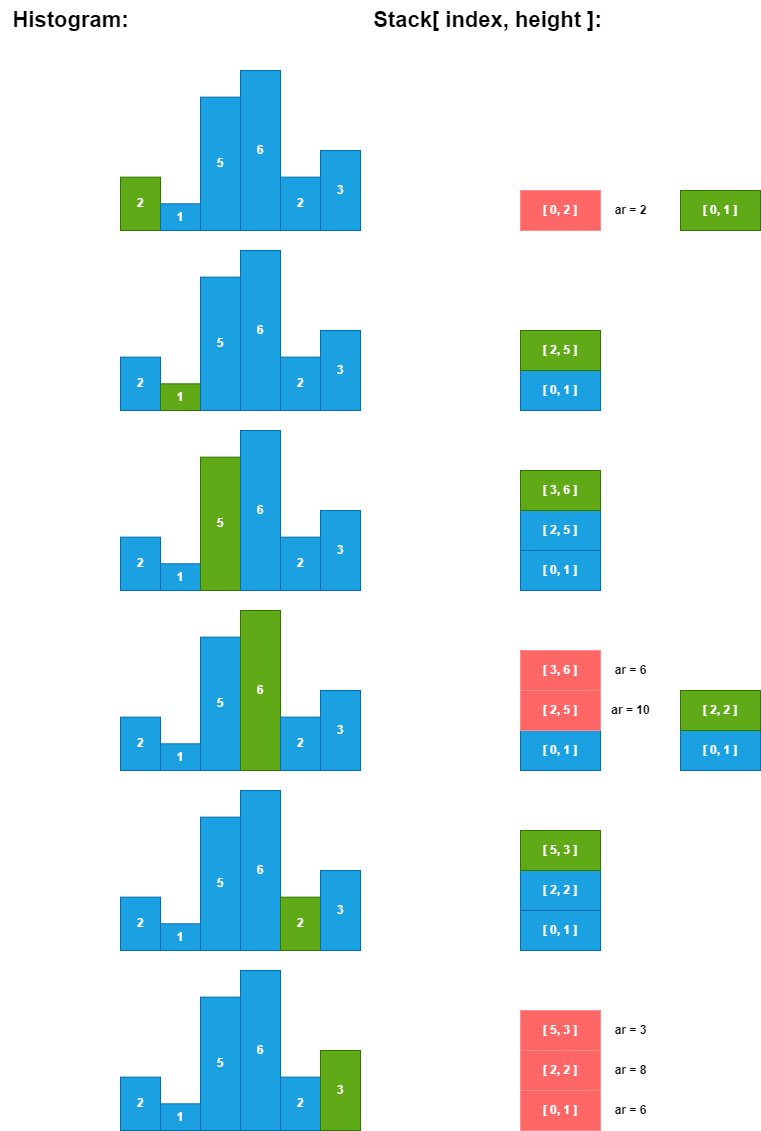

## Sliding Window <a name="slidingwindow"></a>

### 121. Best Time to Buy and Sell Stock:

#### My Initial Solution:

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        maxP = 0
        last = 10000
        for i,p in enumerate(prices):
            if last <= p:
                continue
            profit = 0
            if i < len(prices) - 1:
                profit = max(prices[i+1:len(prices)]) - p
            if profit > maxP:
                maxP = profit
                last = p
        return maxP

- This works, but it exceeds the time limit on some larger test cases.
- The way I approached this problem was to iterate over `prices`, and for each price `p`, I searched for the maximum value `max` in the remaining list to the right.
- Using `p` and `max`, I calculate the `profit` in each iteration, and if it is greater than the maximum profit `maxP`, I replace `maxP` with the current `profit`.

#### Improved Solution:

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        maxP = 0
        last = 10000
        maxV = max(prices)
        for i,p in enumerate(prices):
            if p == maxV and maxV != 0 and i < len(prices) - 1:
                maxV = max(prices[i+1:len(prices)])
            if last <= p:
                continue
            profit = 0
            if i < len(prices) - 1:
                profit = maxV - p
            if profit > maxP:
                maxP = profit
                last = p
        return maxP

- I made the slight improvement that the maximum value, `max`, will only be recalculated when it is reached as `p`.
- Unfortunately, there was one test case that I was unsure how to pass, so I had to hardcode it with a conditional check to determine whether `maxV` is equal to `0`.

### 3. Longest Substring Without Repeating Characters

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        left, right = 0, 1
        maxW = 0
        
        while right < len(s) + 1:
            window = s[left:right]
            #print(window)
            if len(window) > maxW:
                maxW = len(window)
            leftC = s[left]
            if right == len(s):
                right += 1
            else:
                rightC = s[right]
                if rightC in window:
                    left += 1
                else:
                    right += 1
        return maxW

- The way I approached this problem was to put pointers `left` and `right` on the first two characters in `s`, and consider the `window` inbetween the two pointers.
- Whenever the character to the right, `rightC`, would already appear in the `window`, we increase the `left` pointer by one; otherwise, we increase the right pointer by one.
- Furthermore, we keep track of the largest `window` in the variable `maxW`.

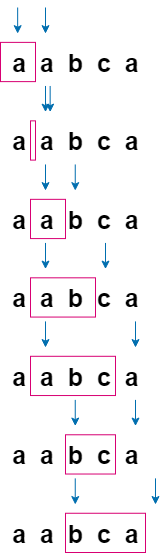

### 424. Longest Repeating Character Replacement

In [ ]:
class Solution:
    def isValid(self, window: str, k: int, freq: dict) -> bool:
        if window == '':
            return True
        maxKey = max(freq, key=freq.get)
        if len(window) - freq[maxKey] <= k:
            return True
        return False


    def characterReplacement(self, s: str, k: int) -> int:
        freq = defaultdict(int)
        left, right = 0,0
        maxW = 0

        while right < len(s) + 1:
            window = s[left:right]
            if self.isValid(window, k, freq):
                if len(window) > maxW:
                    maxW = len(window)
                #print(f's[{left}:{right}] = {window}, valid')
                if right < len(s):
                    freq[s[right]] += 1
                right += 1
            else:
                #print(f's[{left}:{right}] = {window}, invalid')
                freq[s[left]] -= 1
                left += 1
        return maxW

- I was not able to find the solution for this problem on my own, so I looked at the explanation video provided by Neetcode.
- The way it works is that we iterate over `s` with a sliding `window` between `left` and `right`, and check whether the amount of characters that would need to be replaced in that window is within the limit of replaceable characters `k`.
- This is ensured via the helper function `isValid`, which returns `True` when the amount of a window's characters that differ from it's most frequent character, i.e. the characters that would have to be replaced, is within the limit `k`.
- Whenever a window is valid, it will be extended to the `right` and when it is not valid, it's size will be decreased from the `left`.
- The size of the largest valid `window` is being tracked in the variable `maxW`.

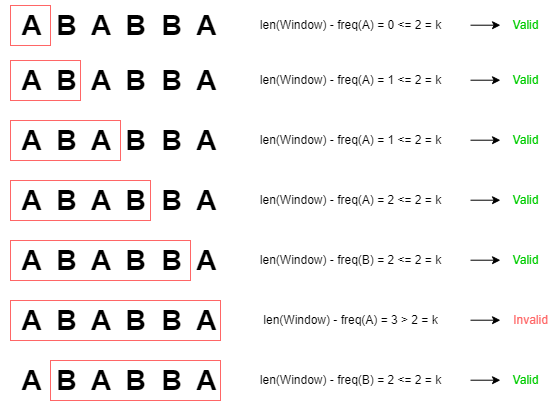

### 567. Permutation in String

In [ ]:
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        res = False
        left, right = 0,1
        freq = defaultdict(int)
        for c in s1:
            freq[c] += 1

        freqW = defaultdict(int)
        flag = False

        while right < len(s2) + 1:
            window = s2[left:right]
            if not flag:
                freqW[s2[right-1]] += 1
            #print(f'freq: {dict(freq)} freqW: {dict(freqW)} window: {window}')
            # invalid window
            if not s2[right-1] in freq.keys():
                freqW.clear()
                left = right
                right += 1
                flag = False
            # invalid window
            elif freqW[s2[right-1]] > freq[s2[right-1]]:
                freqW[s2[left]] -= 1
                left += 1
                flag = True
            # valid window
            else:
                if freqW == freq:
                    res = True
                    return res
                right += 1
                flag = False

        return res

- The solution to this problem was pretty straightforward. 
- How it works is that we iterate over `s2` with a sliding `window` between `left` and `right`, and whenever the frequency of letters in `window`, `freqW`,  fits into the frequency of letters in `s1`, `freq`, we increase the window size towards the `right`.
- When this is not the case, we start with a new `window` on the next letter towards the right of our current `window`.

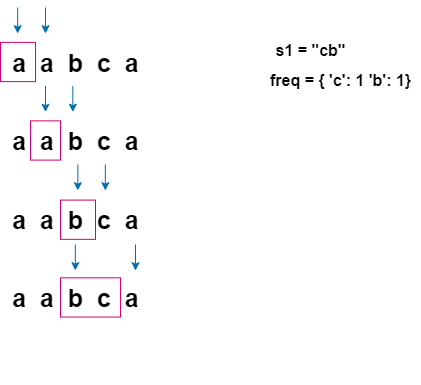

### 76. Minimum Window Substring

#### My Initial Attempt:

In [ ]:
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        res = ""
        left,right = 0,0
        dic = defaultdict(int)
        for c in t:
            dic[c] += 1
        dicW = defaultdict(int)
        minW = 100000
        #print(f's: {s} t: {t} dic: {dict(dic)}')
        f = True
        
        while right < len(s):
            if f and s[right] in list(dic.keys()):
                dicW[s[right]] += 1

            print(f's[{left}:{right+1}] = {s[left:right+1]} , {dict(dicW)}')

            # right elem is contained in the window too often -> decrease left until no longer too often
            if s[right] in dicW.keys() and dicW[s[right]] > dic[s[right]]:
                while dicW[s[right]] > dic[s[right]] or s[left] not in list(dicW.keys()):
                    if s[left] in list(dicW.keys()):
                        if dicW[s[left]] == 1:
                            dicW.pop(s[left])
                        else:
                            dicW[s[left]] -= 1
                    left += 1
                    f = False

            # increase window to the right to reach dic
            elif dicW != dic:
                if dicW == {} and not s[left] in list(dic.keys()):
                    left += 1
                    right += 1
                else:
                    right += 1
                f = True

            # dic has been reached -> decrease left until first occurence of an elem in dic
            elif dicW == dic:
                if len(s[left:right+1]) < minW:
                    minW = len(s[left:right+1])
                    res = s[left:right+1]
                if dicW[s[left]] == 1:
                    dicW.pop(s[left])
                else:
                    dicW[s[left]] -= 1
                while left < right and not s[left+1] in dic.keys():
                    left += 1
                if abs(left-right) > 0:
                    left += 1 
                f = False
                if right == len(s)-1:
                    break
        return res

- Unfortunately, this is not quite the correct algorithm for solving this problem, although it passes almost all test cases.
- However, I noticed on test case 192 that this algorithm is unable to handle a certain case, so I had to figure out a new one, which I did shortly after.

#### Improved Solution:

In [ ]:
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        res = ""
        left,right = 0,0
        dic = defaultdict(int)
        for c in t:
            dic[c] += 1
        dicW = defaultdict(int)
        minW = 100000
        valid = False
        #print(f's: {s} t: {t} dic: {dict(dic)}')

        # increase window to the right until its valid and set valid flag if it is
        while right < len(s):
            if s[right] in list(dic.keys()):
                dicW[s[right]] += 1
            count = 0
            for k,v in dic.items():
                count += 1
                if not k in dicW.keys() or not dicW[k] >= v:
                    valid = False
                    break
                if count == len(dic):
                    valid = True
            if valid:
                break
            right += 1
        #print(f'[0.1]  {s[left:right+1]}  {dict(dicW)}')

        if valid:
            while ( s[left] in dicW.keys() and dicW[s[left]] > dic[s[left]] ) or ( not s[left] in dic.keys() ):
                if s[left] in dicW.keys():
                    dicW[s[left]] -= 1
                left += 1
        #print(f'[0.2]  {s[left:right+1]}  {dict(dicW)}')
    
        if valid and len(s[left:right+1]) < minW:
            minW = len(s[left:right+1])
            res = s[left:right+1]

        counter = 0
        while right < len(s):

            while right+1 < len(s) and not s[right+1] in dic.keys():
                right += 1
            right += 1
            if right < len(s):
                dicW[s[right]] += 1
            #print(f'[{counter+1}.1]  {s[left:right+1]}  {dict(dicW)}')
            
            while ( s[left] in dicW.keys() and dicW[s[left]] > dic[s[left]] ) or ( not s[left] in dic.keys() ):
                if s[left] in dicW.keys():
                    dicW[s[left]] -= 1
                left += 1
            #print(f'[{counter+1}.2]  {s[left:right+1]}  {dict(dicW)}')

            if len(s[left:right+1]) < minW:
                minW = len(s[left:right+1])
                res = s[left:right+1]

            counter += 1
        return res

- Fortunately, my improved algorithm was able to pass all of the tests, but it took me quite a while longer to implement than I expected.
- The way it works is that we move a sliding window over `s` until `right` is no longer inside the bounds of `s`, and in each iteration we first increase the window towards the `right` and then decrease it from the `left`.
- Starting with a `valid` window, we increase the window towards the `right` until we encounter the first character that is part of `t`, or until we have reached the end of `s`.
- Then we decrease the window from the `left` as long as the window stays `valid`, i.e., it contains all of the letters contained in `t`.
- Furthermore, we keep track of the smallest window with the variable `minW`.
- The algorithm is best understood with the graphic that I have provided below.

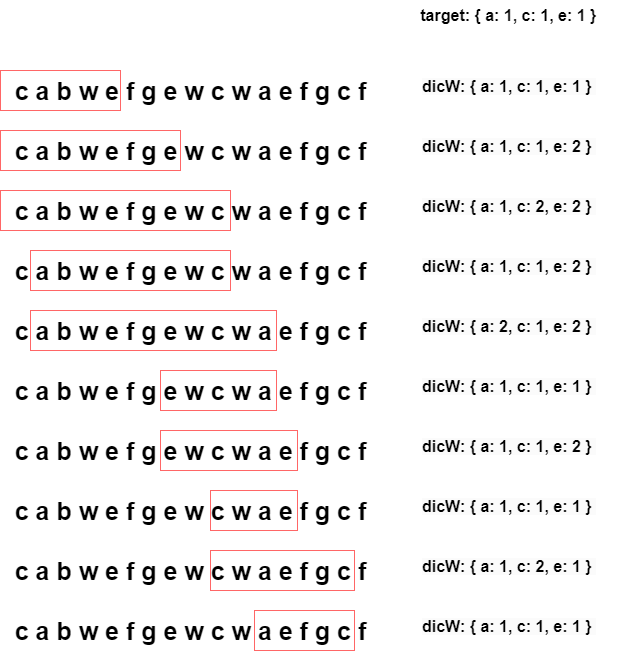

### 239. Sliding Window Maximum

#### My Initial Solution:

In [ ]:
class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        if k == 1:
            return nums
        left, right = 0, k
        window = nums[left:right]
        maxV = max(window)
        res = [maxV]
        while right < len(nums):
            window = nums[left:right]
            #print(window)
            if nums[left] == maxV:
                maxV = max(window[1:])
            if nums[right] > maxV:
                maxV = nums[right]
            res.append(maxV)
            left += 1
            right += 1
            #print(res)
        return res

- This does return the correct results, but it is not efficient enough to pass some larger test cases.
- I am sure that the thing that is increasing the time complexity is the recalculation of the maximum value `maxV` in the current `window` when the value on the `left` is equal to the current `maxV.`
- Maybe I can skip that step by keeping track of not only the largest value but also the second largest value inside each `window`.

#### Improved Solution:

In [ ]:
class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        res = []
        left, right = 0,0
        deque = collections.deque()

        while right < len(nums):
            # pop everything less than nums[right] from deque so that the largest value is always in deque[0]
            while deque and nums[right] > nums[deque[-1]]:
                deque.pop() 
            deque.append(right)
            # pop left index from deque if the current left index of our window is already further ahead
            if left > deque[0]:
                deque.popleft()
            # shift window by one to the right and append current max(deque[0]) to res
            if (right + 1) >= k:
                res.append(nums[deque[0]])
                left += 1
            right += 1
        return res

- I was unable to find an efficient solution to this problem on my own, so I looked up the solution video provided by Neetcode.
- The way it works is that we are using the `deque` data structure to store the index of the largest value for each window at `deque[0]`.
- At the beginning of every iteration, we `pop` from the `deque` while the value that the `right` pointer is on is larger than the value of the rightmost element in the `deque`, and append `right` to the `deque` afterwards.
- By doing this and adding an additional check to ensure that `deque[0]` is still inside our current window and `popping` from the `left`, otherwise, `deque[0]` will always hold the maximum value for our current window.

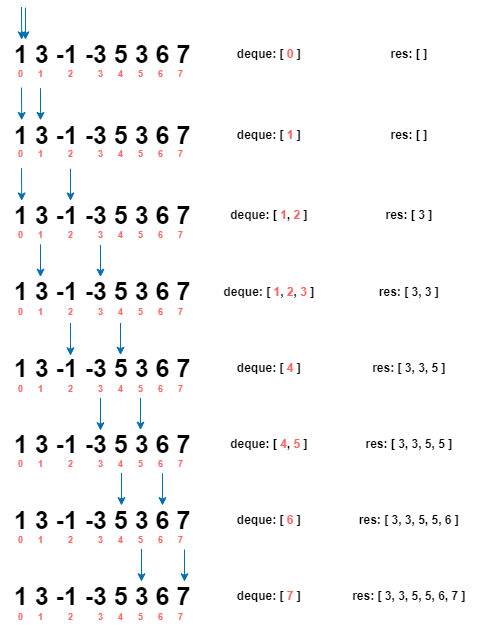

## Binary Search <a name="binarysearch"></a>

### 704. Binary Search

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, target: int) -> int:
        if r >= l:
            middle = l + (r-l)//2

            if nums[middle] == target:
                return middle
            elif nums[middle] < target:
                return self.bin(nums, middle+1, r, target)
            elif nums[middle] > target:
                return self.bin(nums, l, middle-1, target)
        else:
            return -1

    def search(self, nums: List[int], target: int) -> int:
        return self.bin(nums, 0, len(nums)-1, target)

- The solution to this problem was quite simple.
- The way it works is that we define a recursive function `bin`, that will perform a binary search on `nums` and return the index of `target` if it gets found and `-1` otherwise.

### 74. Search a 2D Matrix

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, target: int) -> bool:
        if r >= l:
            middle = l + (r-l)//2

            if nums[middle] == target:
                return True
            elif nums[middle] < target:
                return self.bin(nums, middle+1, r, target)
            elif nums[middle] > target:
                return self.bin(nums, l, middle-1, target)
        else:
            return False

    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        nums = list(itertools.chain.from_iterable(matrix))
        return self.bin(nums, 0, len(nums)-1, target)

- This was pretty much just a copy-paste of the previous question, with the exception that I first had to flatten the list of lists, `matrix`.
- Furthermore, we were only expected to return `True` if the value is contained in `nums` and `False` otherwise.

### 875. Koko Eating Bananas

In [ ]:
class Solution:
    def getHours(self, k: int, piles: List[int]) -> int:
        h = 0
        for pile in piles:
            h += math.ceil(pile/k)
        return h

    def bin(self, piles: List[int], l: int, r: int, target: int, maxK: tuple[int, int]) -> int:
        if l <= r:
            middle = l + (r-l)//2
            k = middle+1
            hours = self.getHours(k, piles)
            #print(f'l = {l}  r = {r}  k = {k}  getHours({k}) = {hours}')

            if hours == target:
                while k > 1 and self.getHours(k-1, piles) == target:
                    k -= 1
                return k
            elif hours < target:
                if hours > maxK[1]:
                    maxK[1] = hours
                    maxK[0] = k
                return self.bin(piles, l, middle-1, target, maxK)
            elif hours > target:
                return self.bin(piles, middle+1, r, target, maxK)
        else:
            return maxK[0]

    def minEatingSpeed(self, piles: List[int], h: int) -> int:
        k = self.bin(piles, 0, max(piles)-1, h, [0,0])
        return k

- This problem was a little tricky to figure out, but fortunately I did get to the solution after some failed attempts.
- The way it works is that we perform a binary search for `h` in the list of all possible values for `k`, which will be an index list starting with `1` and ending with the value of the largest `pile`.
- When we find `k`, whose hours match the given hours `h`, we have to decrease `k` until there is no smaller `k`, whose hours also match `h`.
- Lastly, we also have to keep track of the value `k` with the largest number of `hours` that are still within our target `h`, and return that in our binary search if the exact target `h` can't be found.

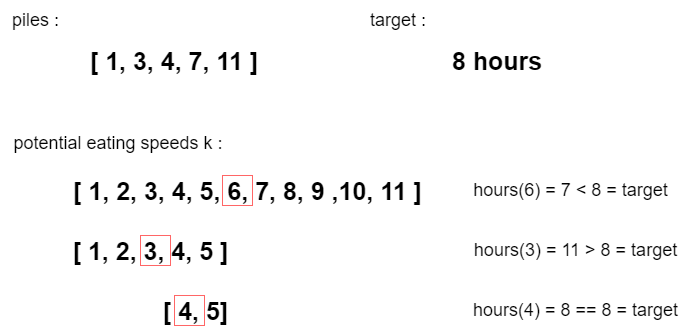

### 153. Find Minimum in Rotated Sorted Array

#### My Initial Solution:

In [ ]:
class Solution:
    def findMin(self, nums: List[int]) -> int:
        return min(nums)

- This solution got accepted for whatever reason.
- It is not the intended solution, though, that is for sure.

#### Improved Solution:

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, min: int) -> int:
        if l <= r:
            middle = l + (r-l)//2

            #print(f'l = {l}  r = {r}  m = {middle}  nums[m] = {nums[middle]}')

            if nums[r] < nums[middle-1]:
                #print(f'{nums[r]} < {nums[middle-1]}')
                if nums[middle] < min:
                    min = nums[middle]
                return self.bin(nums, middle+1, r, min)
            elif nums[r] >= nums[middle-1]:
                #print(f'{nums[r]} >= {nums[middle-1]}')
                if nums[middle] < min:
                    min = nums[middle]
                return self.bin(nums, l, middle-1, min)
        else:
            return min

    def findMin(self, nums: List[int]) -> int:
        if len(nums) < 3:
            return min(nums)
        return self.bin(nums, 0, len(nums)-1, 5000)

- With this solution, I was able to reduce the runtime complexity to O(log n), as the task expected.
- Unfortunately, it only works for inputs with a length greater than 2, which is why I return `min(nums)` if `nums` contains 2 or fewer elements.
- The way it works is that we choose between the left and right subarrays based on the condition that the topmost element in that subarray should be less than the topmost element in the other subarray.
- Throughout this process, we keep track of the minimum value with the variable `min` and return that after the binary search has been completed.

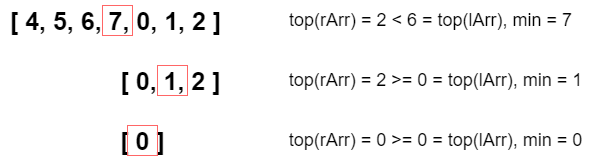

### 33. Search in Rotated Sorted Array

In [ ]:
class Solution:
    def bin(self, nums: List[int], l: int, r: int, target: int) -> int:
        if l <= r:
            m = l + (r-l)//2
            #print(f'l = {l}  r = {r}  m = {m}  nums[m] = {nums[m]}')
            if nums[m] == target:
                return m
            elif nums[r] == target:
                return r
            elif nums[m-1] == target:
                return m-1
            # case 1 / 2
            elif nums[m-1] >= target and nums[r] >= target or nums[m-1] <= target and nums[r] <= target:
                if nums[m-1] < nums[r]:
                    return self.bin(nums, l, m-1, target)
                else:
                    return self.bin(nums, m+1, r, target)
            # case 3
            elif nums[m-1] >= target and not nums[r] >= target:
                return self.bin(nums, l, m-1, target)
            # case 4
            elif nums[r] >= target and not nums[m-1] >= target:
                return self.bin(nums, m+1, r, target)
        else:
            return -1
    def search(self, nums: List[int], target: int) -> int:

        # case 1 topleft and topright >= target  -> go with lesser top
        # case 2 topleft and topright <= target  -> go with lesser top
        # case 3 topleft >= target and topright not >= target -> go left
        # case 4 topright >= target and topleft not >= target -> go right

        return self.bin(nums, 0, len(nums)-1, target)

- The way I figured out the solution to this problem was by looking at a few test cases and coming up with a way of finding the target with a modified version of binary search.
- There are four cases based on which I decide whether to continue the search in the left or the right subarray.
- I have added the cases as comments inside the solution code.

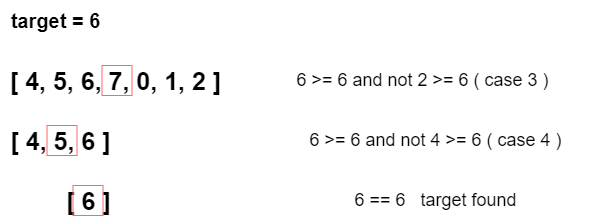

### 981. Time Based Key-Value Store

In [ ]:
class TimeMap:
    def __init__(self):
        self.map = defaultdict(list)
        

    def set(self, key: str, value: str, timestamp: int) -> None:
        if len(self.map[key]) == 0:
            self.map[key].append([value, timestamp])
        else: 
            bisect.insort(self.map[key], [value, timestamp], key=lambda x: x[1])
        #print(dict(self.map))


    def get(self, key: str, timestamp: int) -> str:
        def binS(vals: List, l: int, r: int, target: int, maxT: List) -> str:
            if l <= r:
                m = l + (r-l)//2
                #print(f't = {target}  l = {l}  r = {r}  m = {m}  vals[m] = {vals[m]}')

                if vals[m][1] == target:
                    return vals[m][0]
                elif vals[m][1] < target:
                    if vals[m][1] > maxT[1]:
                        maxT[1] = vals[m][1]
                        maxT[0] = vals[m][0]
                    return binS(vals, m+1, r, target, maxT)
                elif vals[m][1] > target:
                    return binS(vals, l, m-1, target, maxT)
            else: 
                return maxT[0]

        if not key in self.map.keys():
            return ""
        vals = self.map[key]
        return binS(vals, 0, len(self.map[key])-1, timestamp, ["", 0])


        
# Your TimeMap object will be instantiated and called as such:
# obj = TimeMap()
# obj.set(key,value,timestamp)
# param_2 = obj.get(key,timestamp)

- The solution to this problem was quite straightforward, and both the `set` and `get` operations have a runtime complexity of O(log(n)).
- How it works is that we keep a sorted list of `values` and their `timestamps` for every key. These are stored in the dictionary `self.map`.
- Whenever we `set` a value, we use `bisect.insort` to insert the value into its respective list while keeping the list sorted.
- When the `get` method is called, we perform a simple binary search to find the value with the appropriate `timestamp`.

### 4. Median of Two Sorted Arrays

In [ ]:
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        A, B = nums1, nums2
        total = len(A) + len(B)
        half = total//2

        if len(A) > len(B):
            A, B = B, A

        left, right = 0, len(A)-1
        while True:
            i = (left + right)//2
            j = half - i - 2

            print(f'{A[:i+1]}  {B[:j+1]}')

            Aleft = A[i] if i >= 0 else float("-infinity")
            Aright = A[i+1] if (i+1) < len(A) else float("infinity")
            Bleft = B[j] if j >= 0 else float("-infinity")
            Bright = B[j+1] if (j+1) < len(B) else float("infinity")

            if Aleft <= Bright and Bleft <= Aright:
                if total % 2 == 1:
                    return min(Aright, Bright)
                return (max(Aleft, Bleft) + min(Aright, Bright)) / 2
            
            elif Aleft > Bright:
                right = i-1
            
            else:
                left = i+1

- Unfortunately, I was unable to come up with the solution to this problem on my own, so I had to look up the solution provided by Neetcode.
- How it works is that we try to find a partition of the left half of the merged list consisting of `num1` and `num2`.
- Further, it has to satisfy the condition that the rightmost element of each of the two parts has to be less or equal to the first element to the right of the other part.
- We achieve this with a binary search through the smaller of the two lists, called `A`.

## Linked List <a name="linkedlist"></a>

### 206. Reverse Linked List

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head:
            return None
        
        newHead = ListNode(head.val)
        first = True
        while head.next:
            newHead = ListNode(head.next.val)
            newHead.next = ListNode(head.val) if first else prev
            prev = newHead
            first = False
            head = head.next

        return newHead

- At first, I had a few problems figuring out how to properly create a new linked list with fully contiguous nodes.
- After I had figured that out, coding out the solution was not very difficult.
- How it works is that we traverse through the given linked list and add the next element `head.next` as a new node while adding the previous element `prev` as the `next` node.

### 21. Merge Two Sorted Lists

In [ ]:
class Solution:
    def add_last(self, llist: Optional[ListNode], node: Optional[ListNode]):
        if llist is None:
            llist = node
            return
        while not llist.next is None:
            llist = llist.next
        llist.next = node
    def mergeTwoLists(self, list1: Optional[ListNode], list2: Optional[ListNode]) -> Optional[ListNode]:
        if list1 is None and list2 is None:
            return None

        res = ListNode()
        while list1 or list2:
            if list1 and list2:
                if list1.val <= list2.val:
                    #print(f'case 1 {list1.val}')
                    self.add_last(res, ListNode(list1.val))
                    list1 = list1.next
                else:
                    #print(f'case 2 {list2.val}')
                    self.add_last(res, ListNode(list2.val))
                    list2 = list2.next
            elif list1 and not list2:
                #print(f'case 3 {list1.val}')
                self.add_last(res, ListNode(list1.val))
                list1 = list1.next
            elif list2 and not list1:
                #print(f'case 4 {list2.val}')
                self.add_last(res, ListNode(list2.val))
                list2 = list2.next
        res = res.next
        return res


- I am still struggling to become more comfortable working with linked lists, so I spent more time on this problem than I had wanted.
- The way it works is that we iterate over the given linked lists `list1` and `list2` until we have reached the end of both, and we add the minimum of the two current values to our resulting list `res`.

### 143. Reorder List

#### My Initial Solution:

In [ ]:
class Solution:
    def popTail(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head is None:
            #print('[0] popped None')
            return None
        elif head.next is None:
            #print(f'[1] popped {head.val}')
            return head
        while head.next:
            curr = head
            head = head.next
        curr.next = None
        #print(f'[2] popped {head.val}')
        return head

    def reorderList(self, head: Optional[ListNode]) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        if not head or not head.next:
            return 
        
        res = head

        c = 0
        while head:
            c += 1
            head = head.next
        head = res

        while head:
            tmp = head.next
            head.next = self.popTail(head)
            if c % 2 == 0 and tmp.next:
                head.next.next = tmp
            elif c % 2 == 1:
                head.next.next = tmp
            else:
                break
            head = tmp
        head = res

- This does result in the correct reordering of elements, but the time complexity is in O(n^2) so it does not pass the last, large test case.
- The time complexity comes from the function `popTail`, which traverses the given linked list `head` until it reaches its tail, which it will remove and return.
- We iterate over the given linked list `head`, and call `popTail` on every element until we have achieved the proper reordering.

#### Another Solution:

In [ ]:
class Solution:
    def insertAfterId(self, head: Optional[ListNode], i: int, insert: Optional[ListNode]):
        #print(f'{insert.val} -> {i}')
        s = head
        j = 0
        while j < i and head.next:
            head = head.next
            j += 1
        tmp = head.next
        tmp2 = head.next.next
        head.next = insert
        insert.next = tmp
        insert.next.next = tmp2
        head = s

    def printList(self, head: Optional[ListNode], i: int):
        v = head
        l = []
        while v and len(l) < i:
            l.append(v.val)
            v = v.next
        print(l)

    def truncate(self, head: Optional[ListNode], i: int):
        s = head
        for j in range(i-1):
            head = head.next
        head.next = None
        head = s

    def reorderList(self, head: Optional[ListNode]) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        s = head
        total = 0
        while head:
            total += 1
            head = head.next
        
        head = s
        count = total // 2
        i = 0
        curr = head
        while i < total:
            v = curr
            curr = curr.next
            if i == total - count:
                if i-1 != count - 1:
                    self.insertAfterId(head, count-1, v)
                count -= 1
                #self.printList(s, total)
            i += 1

        head = s
        self.truncate(head, total)

- The time complexity for this solution should be less than the previous solution's time complexity, but it is still not fast enough to pass the last test case.
- My idea this time around was to iterate over the linked list `head`, and once I reach the halfway point, I start shifting elements to the front of the linked list with the helper function `insertAfterId`.
- The problem here is that `insertAfterId` traverses the linked list until it reaches the given index `i`, which adds up and results in too much runtime.

#### Improved Solution:

In [ ]:
class Solution:
    def truncate(self, head: Optional[ListNode], i: int):
        s = head
        for j in range(i-1):
            head = head.next
        head.next = None
        head = s

    def reorderList(self, head: Optional[ListNode]) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        d = collections.deque()
        s = head
        total = 0
        while head:
            total += 1
            d.append(head.val)
            head = head.next
        head = s
        
        for i in range(total//2):
            d.popleft()
        if total % 2:
            d.popleft()

        while d:
            toAppend = d.pop()
            tmp = head.next
            head.next = ListNode(toAppend)
            head.next.next = tmp
            head = head.next.next

        head = s 
        self.truncate(head, total)

- At last, I have figured out how to do this efficiently, but I had to trade some space complexity for better time complexity.
- The way I have done it is to use a double-ended queue `d`, which will be filled with the values of the nodes in the right half of the linked list.
- After filling the deque with the node values, I iterate over it and insert the nodes in their proper positions in the linked list.
- Lastly, I still have to truncate the linked list to its original length due to the way I am inserting the new nodes, which I achieve with the helper function `truncate`.

### 19. Remove Nth Node From End of List

In [ ]:
class Solution:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        if not head or not head.next:
            return None

        res = head
        count = 0
        while head:
            head = head.next
            count += 1
    
        removeIdx = count-n
        if removeIdx == 0:
            res = res.next
            return res

        head = res
        count = 1
        while head:
            if count == removeIdx:
                head.next = head.next.next
            count += 1
            head = head.next
        
        return res

- Luckily, this problem was not too difficult to solve.
- The way it works is that we iterate over the linked list `head`, once to find out its length, which we save in the variable `count`.
- We can then calculate the index of the element that we would like to remove by subtracting `n` from `count`, and we will save the result in the variable `removeIdx`.
- Lastly, we iterate through the linked list and remove the element at `removeIdx`.

### 138. Copy List with Random Pointer

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random
"""

class Solution:
    def copyRandomList(self, head: 'Optional[Node]') -> 'Optional[Node]':
        if not head:
            return None
        d = {}
        while head:
            d[str(head)[-13:-1]] = [head.val, str(head.next)[-13:-1] if head.next else None, str(head.random)[-13:-1] if head.random else None]
            head = head.next

        first = True
        res = Node(0)
        for k,v in d.items():
            new = Node(v[0], None, None)
            if first:
                res = new
                first = False
            d[k].append(new)

        # print(d)
        for k,v in d.items():
            v[3].next = None if v[1] is None else d[v[1]][3]
            v[3].random = None if v[2] is None else d[v[2]][3]
            # print(f'node {v[3].val}  next {v[3].next.val if v[3].next else None}  random {v[3].random.val if v[3].random else None}')

        return res

- The solution for this was not that easy to figure out, but I believe I have found a pretty creative way of solving this problem.
- The way it works is that we traverse the given linked list and store the information about the specific nodes in a dictionary `d` with the unique memory addresses of the nodes as `keys`.
- Afterwards, we can create a new node for each dictionary entry, copying the original node's values.
- Lastly, we use our previously created dictionary `d` to figure out which node we will have to set as `next`, and which node we have to set as `random`.

### 2. Add Two Numbers

In [ ]:
class Solution:
    def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        num1 = num2 = ''
        while l1:
            num1 = str(l1.val) + num1
            l1 = l1.next
        while l2:
            num2 = str(l2.val) + num2
            l2 = l2.next
        res = str(int(num1) + int(num2))[::-1]
        head = ListNode()
        it = head
        for c in res:
            it.next = ListNode(int(c))
            it = it.next
        head = head.next
        return head

- This problem was not very difficult either.
- The way it works is that we first iterate through the given linked lists `l1` and `l2` to convert them into their integer representations `num1` and `num2`.
- We can then add `num1` and `num2` together and save the result in `res`.
- Lastly, we can iterate over a string representation of `res` and create new nodes for our resulting list, which will hold the characters converted to integers as values.

### 141. Linked List Cycle

In [ ]:
class Solution:
    def hasCycle(self, head: Optional[ListNode]) -> bool:
        counter = 0
        while head:
            counter += 1
            head = head.next
            if counter == 10001:
                return True
        return False

- Well, it works... 
- It is probably not the intended solution, but I figured that I could iterate through the linked list with a `counter`, and if the `counter` exceeds the given constraint that a linked list contains at most 10000 nodes, then the linked list must contain a cycle.

### 287. Find the Duplicate Number

In [ ]:
class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        s = f = 0
        while True:
            s = nums[s]
            f = nums[nums[f]]
            if f == s:
                break
        
        s2 = 0
        while True:
            s = nums[s]
            s2 = nums[s2]
            if s == s2:
                return s

- Truth be told I would have never gotten to the solution for this one on my own.
- What you were supposed to do here was use **Floyd's Algorithm** to first find the index where the fast pointer `f` and the slow pointer `s` intersect.
- Afterwards, you were supposed to put another slow pointer `s2` at the start of `nums` and move both `s` and `s2` until they intersect, which will be on the duplicate number.

### 146. LRU Cache

In [ ]:
class Node:
    def __init__(self, key=0, val=0, next=None, prev=None):
        self.key = key
        self.val = val
        self.next = next
        self.prev = prev

class LRUCache:
    def __init__(self, capacity: int):
        self.cap = capacity
        self.d = {}
        self.head = None
        self.tail = None    


    def get(self, key: int) -> int:
        try:
            n = self.d[key]
            if n == self.tail:
                self._tail()
                if len(self.d) == 0:
                    self.tail = n
                self._add(n)
            elif n == self.head:
                pass
            else:
                self._remove(n)
                self._add(n)
            self.d[key] = n
            #self.debug('g1', key, n.val)
            return n.val
        except KeyError:
            #self.debug('g2', key, -1)
            return -1


    def put(self, key: int, value: int) -> None:
        # at capacity
        if len(self.d) == self.cap:

            # just updating the value
            if key in self.d.keys():
                n = self.d[key]
                if n == self.tail:
                    self._tail()
                else:
                    self._remove(n)
                n.val = value
                self._add(n)
                self.d[key] = n
                #self.debug('a1', key, value)

            # remove LRU and add new
            else:
                if len(self.d) == 1:
                    self.d.pop(self.tail.key)
                    self.head = self.tail = None
                else:
                    self._tail()
                n = Node(key, value, None, None)
                self._add(n)
                self.d[key] = n
                #self.debug('a2', key, value)

        # still have space
        else:
            # just updating the value
            if key in self.d.keys():
                n = self.d[key]
                if n == self.tail:
                    self._tail()
                    if len(self.d) == 0:
                        self.tail = n
                else:
                    self._remove(n)
                n.val = value
                self._add(n)
                self.d[key] = n
                #self.debug('a3', key, value)

            # add new
            else:
                n = Node(key, value, None, None)
                self._add(n)
                self.d[key] = n
                #self.debug('a4', key, value)

    
    def _add(self, node):
        h = self.head
        if not h:
            self.tail = node
        self.head = node
        self.head.next = h
        self.head.prev = None
        if h:
            h.prev = self.head

    def _remove(self, node):
        if node:
            if node.prev:
                node.prev.next = node.next
            if node.next:
                node.next.prev = node.prev
                if node == self.head:
                    self.head = node.next

    def _tail(self):
        if self.tail:
            self.d.pop(self.tail.key)
            self.tail = self.tail.prev
            if self.tail:
                self.tail.next = None

    def debug(self, m, key, value):
        if m == 'g1' or m == 'g2':
            print(f'[{m}] get({key}) -> {value}')
        else:
            print(f'[{m}] added ({key}: {value}) to d')
        l = []
        l2 = []
        for k,v in self.d.items():
            l.append([k, v.val])
        print(f'd = {list(reversed(l))}')
        a = self.head
        c = 0
        while a:
            c+=1
            l2.append([{'key': a.key}, {'val': a.val}, {'next': a.next.val if a.next else None}, {'prev': a.prev.val if a.prev else None}])
            a = a.next
            if c == self.cap:
                break
        print(f'LL = {l2}')
        print(f'head = ({self.head.val if self.head else None}  n: {self.head.next.val if self.head and self.head.next else None}  p: {self.head.prev.val if self.head and self.head.prev else None})  tail = ({self.tail.val if self.tail else None}  n: {self.tail.next.val if self.tail and self.tail.next else None}  p: {self.tail.prev.val if self.tail and self.tail.prev else None})')

        

# Your LRUCache object will be instantiated and called as such:
# obj = LRUCache(capacity)
# param_1 = obj.get(key)
# obj.put(key,value)

- If anyone ever asked me this question in an interview, I would walk right out.
- There were so many frustrating edge cases that it felt like it took forever to solve this problem.

### 23. Merge k Sorted Lists

In [ ]:

class Solution:
    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        lists = list(filter(lambda x: x != None, lists))
        if lists == []:
            return None
        s_list = sorted(lists, key=lambda x: x.val)
        res = ListNode()
        head = res
        #print(s_list)
        
        while s_list != []:
            #print(s_list)
            res.next = s_list[0]
            s_list[0] = s_list[0].next
            if s_list[0] is None:
                s_list = s_list[1:]
            else:
                n = s_list[0]
                s_list = s_list[1:]
                bisect.insort(s_list, n, key=lambda x: x.val)
            res = res.next
        res.next = None
                
        return head.next

- This one was not very difficult considering it is rated as a hard problem.
- How it works is that we first sort the given `lists` by the values of the heads of the linked lists and store the result in `s_list`.
- We will then remove the head of the first list in `s_list`, and add it to our resulting linked list `res`.
- Lastly, we reinsert the linked list whose head we just removed into `s_list`, using `bisect.insort` to ensure that `s_list` stays sorted.
- We keep removing the head of the first linked list in `s_list` until all nodes of the linked lists in `s_list` have been removed and added to the result `res`.

### 25. Reverse Nodes in k-Group

In [ ]:
class Solution:
    def printList(self, head: Optional[ListNode]):
        s = head
        l = []
        while head:
            l.append(head.val)
            head = head.next
        head = s
        print(l)

    def reverseListK(self, head: Optional[ListNode], k: int) -> [Optional[ListNode], Optional[ListNode]]:
        if not head:
            return None
        newHead = ListNode(head.val)
        first = True
        i = 0
        tail = newHead
        while head.next and i < k-1:
            newHead = ListNode(head.next.val)
            newHead.next = ListNode(head.val) if first else prev
            if first:
                tail = newHead.next
            prev = newHead
            first = False
            head = head.next
            i += 1

        return newHead, tail
        
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        s = head
        total = 0
        heads = []
        while head:
            total += 1
            if (total-1) % k == 0:
                heads.append(head) 
            head = head.next
        head = s
        reversals = total//k

        first = ListNode()
        s = first
        for j in range(reversals):
            newHead, tail = self.reverseListK(heads[j], k)
            #self.printList(newHead)
            first.next = newHead
            first = tail
        if len(heads) > reversals:
            first.next = heads[-1]
            
        #self.printList(s.next)
        return s.next

- Surprisingly, this hard problem was also not very difficult.
- The way it works is that we first traverse the given linked list and save the heads of the sublists that we are trying to reverse in a list named `heads`.
- We also calculate the number of lists that need to be reversed by doing an integer division of the length of the linked list, `total`, divided by the length of the sublists, `k`. The result of this will be saved in the variable `reversals`.
- Lastly, we iterate over `heads`, and using the helper function `reverseListK`, we calculate all of the reversed sublists and put them together for our result.

## Trees <a name="trees"></a>

### 226. Invert Binary Tree

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def invertTree(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        def a(node):
            if not node:
                return
            l = node.left
            node.left = node.right
            node.right = l
            a(node.left)
            a(node.right)
        a(root)
        return root

- I traversed the given tree recursively and swapped the left and right child nodes of the current `node`.

### 104. Maximum Depth of Binary Tree

In [ ]:
class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        m = 0
        def a(node, d):
            nonlocal m
            if d > m:
                m = d
            if not node:
                return 
            a(node.left, d+1)
            a(node.right, d+1)
        a(root, 0)
        return m

- I did a recursive tree traversal for the given tree, keeping track of the depth with the variable `d`.
- I also kept track of the largest depth via the variable `m`, which I had to specify as `nonlocal` in order to use it in my recursive calls.

### 543. Diameter of Binary Tree

#### My Initial Solution:

In [ ]:
class Solution:
    def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        def subDiam(root: Optional[TreeNode]) -> int:
            m = 0
            def a(node, d):
                nonlocal m
                if d > m:
                    m = d
                if not node:
                    return 
                a(node.left, d+1)
                a(node.right, d+1)
            a(root.left, 0)
            mL = m
            m = 0
            a(root.right, 0)
            mR = m
            return mL+mR

        mD = 0
        def a(node: Optional[TreeNode]) -> int:
            if not node:
                return
            nonlocal mD
            d = subDiam(node)
            if d > mD:
                mD = d
            a(node.left)
            a(node.right)
        a(root)
        return mD

- How I approached this problem was to do a recursive tree traversal on the given tree while keeping track of the largest diameter among its subtrees.
- The diameter for each subtree was calculated via the helper function `subDiam`, which essentially returns the sum of the maximum depths of the given node's left and right subtrees.
- The time complexity and space complexity of this solution are suboptimal, and there is definitely a better way to solve this problem.

#### Improved Solution:

In [ ]:
class Solution:
    def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        mDiam = 0
        def a(node):
            if not node:
                return 0
            nonlocal mDiam
            ldepth = a(node.left)
            rdepth = a(node.right)
            diam = ldepth + rdepth # check if the current diameter d is greater than max diameter
            if diam > mDiam:
                mDiam = diam
            return 1 + max(ldepth, rdepth) # return the longer of the two paths to the left and to the right + 1 for current node
        a(root)
        return mDiam

- This was a solution that I came up with after looking through the solutions tab, but I find it to be somewhat unintuitive.
- How it works is that we traverse the given tree, and on every iteration we do two things. 
- The first thing we do is calculate the current diameter, `diam`, by taking the sum of the depths of the longest paths to the left and to the right, `ldepth` and `rdepth`, and updating our maximum diameter, `mDiam`.
- The second thing we do is return the length of the longer of the two paths to our left and to our right plus 1 for the current node.

### 110. Balanced Binary Tree

In [ ]:
class Solution:
    def isBalanced(self, root: Optional[TreeNode]) -> bool:
        def subBal(root: Optional[TreeNode]) -> bool:
            if not root:
                return True
            m = 0
            def a(node, d):
                nonlocal m
                if d > m:
                    m = d
                if not node:
                    return
                a(node.left, d+1)
                a(node.right, d+1)
            a(root.left, 0)
            mL = m
            m = 0
            a(root.right, 0)
            mR = m
            return abs(mR-mL) <= 1

        res = True
        def a(node):
            nonlocal res
            if not node:
                return
            if not subBal(node):
                res = False
            a(node.left)
            a(node.right)
        a(root)
        return res

- Initially, I had tried to submit my helper function `subBal` as a solution to this problem, but after reading the definition for a **height-balanced tree**  again, I realized that I had to ensure this quality not only for the given tree but for every one of its subtrees as well.
- The function `subBal` returns `True` when the maximum depth of the left and right subtrees of the given tree differ by 1 at most, and it returns `False`, otherwise.
- We recursively traverse the given tree and return `True` if `subBal` returns `True` on every node, and we return `False`, otherwise.
- The runtime complexity of this solution is quite suboptimal, and I am sure there is a better way to do it.

### 100. Same Tree

In [ ]:
class Solution:
    def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        res = True
        def a(n1, n2):
            nonlocal res
            if not n1 and n2:
                res = False
                return
            elif not n2 and n1:
                res = False
                return
            elif not n1 and not n2:
                return
            if n1.val != n2.val:
                res = False
            a(n1.left, n2.left)
            a(n1.right, n2.right)
        a(p,q)
        return res

- I slightly modified my recursive function from earlier to traverse the given trees `p` and `q` simultaneously.
- If at any point the values of the current nodes `n1` and `n2` do not match, or one of the nodes exists while the other does not, we return `False`.

### 572. Subtree of Another Tree

In [ ]:
class Solution:
    def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        res = True
        def a(n1, n2):
            nonlocal res
            if not n1 and n2:
                res = False
                return
            elif not n2 and n1:
                res = False
                return
            elif not n1 and not n2:
                return
            if n1.val != n2.val:
                res = False
            a(n1.left, n2.left)
            a(n1.right, n2.right)
        a(p,q)
        return res
    def isSubtree(self, root: Optional[TreeNode], subRoot: Optional[TreeNode]) -> bool: 
        res = False
        def a(node: Optional[TreeNode], subRoot: Optional[TreeNode]):
            nonlocal res
            if not node:
                return
            if node.val == subRoot.val and not res:
                res = self.isSameTree(node, subRoot)
            a(node.left, subRoot)
            a(node.right, subRoot)

        a(root, subRoot)
        return res

- The way it works is that we do a recursive tree traversal of the given tree, and whenever the value of the current `node` is equal to the value of `subRoot`, we use the function that we have defined in our previous solution to check whether the current tree is equal to the given subtree.
- If we have found a matching subtree, we return `True` and don't perform this check on any other nodes.

### 235. Lowest Common Ancestor of a Binary Search Tree

In [ ]:
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        def inSubtrees(haystack: 'TreeNode', needle: 'TreeNode') -> bool:
            res = False
            def a(node: 'TreeNode'):
                nonlocal res
                nonlocal haystack
                if not node:
                    return
                if not node is haystack and node is needle:
                    res = True
                a(node.left)
                a(node.right)
            a(haystack)
            return res
        
        # traverse until either p or q found
        # if one found and the other in it's subtree return the found node
        # else go up one layer and search again, if found return this node 
        # repeat step 3 
        
        end = False
        found = None
        lcas = []
        res = root
        def a(node: 'TreeNode'):
            if not node:
                return
            nonlocal found, res, lcas, end
            if not found:
                lcas.append(node)

            if found and not end:
                #print(f'searching subtrees of {lcas[-1].val} for {p.val if found == q else q.val}')
                if inSubtrees(lcas[-1], p if found is q else q):
                    #print(f'found it. res -> {lcas[-1].val}')
                    res = lcas[-1]
                    return
                if lcas:
                    lcas.pop()
                    #print(f'didnt find it lcas = {[v.val for v in lcas]}')

            if (node is p or node is q) and not found:
                #print(f'found the first node: {node.val}')
                found = node
                if inSubtrees(found, p if found is q else q):
                    res = found
                    end = True
                lcas.pop()
                return
            a(node.left)
            a(node.right)

        a(root)
        return res

- This problem felt a bit more complicated than the other tree-related problems so far.
- The way I have approached this problem is to search the tree until I find either `p` or `q`, and when I do find one of them, I check whether its subtrees contain the other node.
- If one of the subtrees does contain the other node, the `found` node will be our solution.
- Otherwise, we keep searching the subtrees of the parent node until we find the parent node, whose subtrees contain the other node.

### 102. Binary Tree Level Order Traversal

#### My Initial Solution:

In [ ]:
class Solution:
    def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        res = [ [] for _ in range(2000) ]  #maxnodes = 2000 -> maxdepth = 2000

        def a(node: Optional[TreeNode], d: int):
            if not node:
                return
            res[d].append(node.val)
            a(node.left, d+1)
            a(node.right, d+1)
        a(root, 0)

        return [ l for l in res if l != [] ]

- I am quite sure that I could have done this in a more optimized way by iterating over the tree twice to find out its maximum depth before initializing my result list `res`.
- Nevertheless, this solution also got accepted, but I should probably improve it some other time.
- How it works is that we iterate over the given tree while keeping track of the depth with the variable `d`, and we append the value of the current `node` to the list that keeps track of the nodes at that depth, `res[d]`.

#### Improved Solution:

In [ ]:
class Solution:
    def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        res = []

        def a(node: Optional[TreeNode], d: int):
            if not node:
                return
            if d > len(res)-1:
                res.append([])
            res[d].append(node.val)
            a(node.left, d+1)
            a(node.right, d+1)
        a(root, 0)

        return res

- This runs a lot faster than my previous solution because this time around we dynamically increase the length of the result list `res` with increasing depth `d`.

### 199. Binary Tree Right Side View

#### My Initial Solution:

In [ ]:
class Solution:
    def rightSideView(self, root: Optional[TreeNode]) -> List[int]:
        res = [ [] for _ in range(2000) ]  #maxnodes = 2000 -> maxdepth = 2000

        def a(node: Optional[TreeNode], d: int):
            if not node:
                return
            res[d].append(node.val)
            a(node.left, d+1)
            a(node.right, d+1)
        a(root, 0)

        return [ l[-1] for l in res if l != [] ]

- This is pretty much exactly the same as the last problem, with the slight difference that we return a list containing only the rightmost element of each layer instead of a list containing every layer in its entirety.

#### Improved Solution

In [ ]:
class Solution:
    def rightSideView(self, root: Optional[TreeNode]) -> List[int]:
        res = []

        def a(node: Optional[TreeNode], d: int):
            if not node:
                return
            if d > len(res)-1:
                res.append([])
            res[d].append(node.val)
            a(node.left, d+1)
            a(node.right, d+1)
        a(root, 0)

        return [l[-1] for l in res]

- I have pretty much copied and pasted my improved solution for the previous problem. 

### 1448. Count Good Nodes in Binary Tree

In [ ]:
class Solution:
    def goodNodes(self, root: TreeNode) -> int:
        s = []
        maxS = [root.val if root else None]
        res = 0

        def a(node: TreeNode):
            if not node:
                return

            nonlocal s, maxS, res
            s.append(node)
            if node.val >= maxS[-1]:
                maxS.append(node.val)
            
            #print(f'current path: {[v.val for v in s]}  current max: {[v for v in maxS]}')

            if node.val >= maxS[-1]:
                #print(f"{node.val} is a good node!")
                res += 1

            a(node.left)
            a(node.right)
            if s and not s[-1] is root:
                n = s.pop()
                if maxS and maxS[-1] == n.val and len(maxS) > 1:
                    maxS.pop()
        a(root)

        return res

- The way I have approached this problem is to recursively iterate over the given tree while keeping track of the path to the current `node` with the help of the stack `s`.
- Furthermore, I have used a second stack, `maxS`, to keep track of the maximum value in the current path that is saved in `s`.
- Whenever the value of the current `node` is greater or equal to the maximum in the path leading up to it, `maxS[-1]`,  we increase the number of good nodes by 1.

### 98. Validate Binary Search Tree

#### My Initial Solution:

In [ ]:
class Solution:
    def isValidBST(self, root: Optional[TreeNode]) -> bool:
        def maxN(node):
            if not node:
                return
            nonlocal mx
            if node.val > mx:
                mx = node.val
            maxN(node.left)
            maxN(node.right)
            
        def minN(node):
            if not node:
                return
            nonlocal mn
            if node.val < mn:
                mn = node.val
            minN(node.left)
            minN(node.right)
        
        mx,mn = 2**31-1, -(2**31)-1
        res = True
        def a(node):
            if not node:
                return
            nonlocal res,mx,mn
            if node.left:
                mx = -(2**31)-1
                maxN(node.left)
                print(mx)
                if mx >= node.val:
                    res = False
                    return
            if node.right:
                mn = 2**31-1
                minN(node.right)
                print(mn)
                if mn <= node.val:
                    res = False
                    return
            a(node.left)
            a(node.right)
        a(root)
        return res

- This is probably the most brute-force way to solve this problem, so I am not very happy with this solution.
- How it works is that we utilize the helper functions `minN` and `maxN` to search for the maximum value in every left subtree and the minimum value in every right subtree.
- If the maximum value `mx` of the left subtree is greater or equal to the value of the current `node`, or if the minimum value `mn` of the right subtree is less or equal to the value of the current `node`, we return `False`.

#### Improved Solution:

In [ ]:
class Solution:
    def isValidBST(self, root: Optional[TreeNode]) -> bool:
        def a(node: Optional[TreeNode], mn: int, mx: int) -> bool:
            if not node: 
                return True
            if node.val >= mx or node.val <= mn:
                return False
            return a(node.left, mn, node.val) and a(node.right, node.val, mx)
        return a(root, float(-inf), float(inf))

- Admittedly, I had to look up a better solution to this problem and reimplement it.
- The way it works is that we recursively traverse the given tree with the helper function `a`, which gets called with the parameters `mn` and `mx`, which set a boundary for the smallest and largest allowed values of the current `node`.
- When we branch to the left, we set the upper boundary to the value of the current `node`, and when we branch to the right, we set the lower boundary to the value of the current `node`.

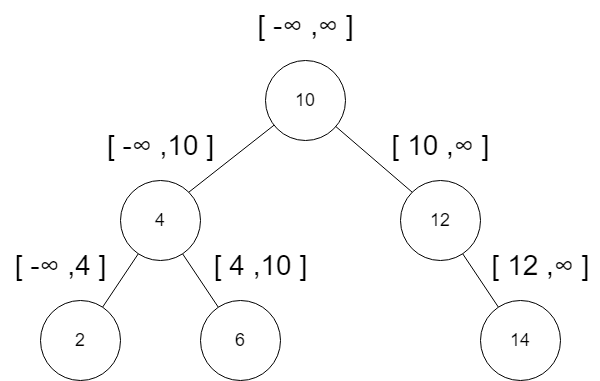

### 230. Kth Smallest Element in a BST

In [ ]:
class Solution:
    def kthSmallest(self, root: Optional[TreeNode], k: int) -> int:
        vals = []
        def a(node: Optional[TreeNode]):
            if not node:
                return
            nonlocal vals
            vals.append(node.val)
            a(node.left)
            a(node.right)
        a(root)
        s_vals = list(sorted(vals))
        return s_vals[k-1]

- This was quite easy, and I am not sure why it has a medium difficulty rating.
- The way it works is that we iterate over the given tree and save the value of every `node` inside of the list `vals`.
- Lastly, we sort `vals` and save the result in `s_vals`. The element at index `k-1` will be the Kth smallest element.

### 105. Construct Binary Tree from Preorder and Inorder Traversal


In [ ]:
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> Optional[TreeNode]:
        if not preorder or not inorder:
            return None
        
        # the first elem in preorder is always the root of that subtree
        root = TreeNode(preorder[0])
        # the index of the root in the inorder list
        i = inorder.index(root.val)
        # recursive call with the elements to the left of root
        root.left = self.buildTree(preorder[1:i+1], inorder[:i])
        # recursive call with the elements to the right of root
        root.right = self.buildTree(preorder[i+1:], inorder[i+1:])
        return root

- Unfortunately, I could not figure out the solution to this problem on my own, so I had to look up the solution provided by Neetcode.
- The way it works is that we build up the tree recursively by calling `buildTree` with the `preorder` traversal and the `inorder` traversal of the left and right subtrees of the current node `root`.
- This works because we know that `root` will always be the first element in the `preorder` traversal.

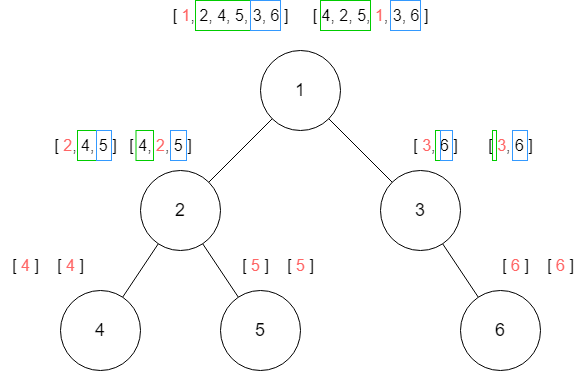

### 124. Binary Tree Maximum Path Sum

In [ ]:
class Solution:
    def maxPathSum(self, root: Optional[TreeNode]) -> int:
        mSum = -1001
        def a(node):
            if not node:
                return 0
            nonlocal mSum
            lsum = a(node.left)
            rsum = a(node.right)
            sums = [node.val, node.val + lsum, node.val + rsum, node.val + lsum + rsum] # all possible sums for the current node
            currentMaxSum = max(sums) # the largest of all possible sums for the current node
            mSum = max(mSum, currentMaxSum) # check if the current max sum is greater than our largest sum so far
            return max(sums[:-1]) # return the largest possible sum for our current node excluding the last sum of sums because this would not be a path anymore
        a(root)
        return mSum

- This problem is extremely similar to the problem *543. Diameter of Binary Tree* so the solution will follow the same approach.
- How it works is that we traverse the given tree and do two things in every iteration.
- The first thing that we do is to recursively retrieve the largest possible sums in the left and right subtrees, `lsum` and `rsum`. We will then figure out the largest possible sum between the current `node` and the two sums that we have retrieved. If this sum, `currentMaxSum`, is larger than the greatest sum we have encountered so far, `mSum`, we update the value of `mSum`.
- The second thing we do is return the largest possible sum between `node`, `lsum`, and `rsum` that still maintains the structure of a path, which is important because we are recursively constructing a path.

### 297. Serialize and Deserialize Binary Tree

In [ ]:
class Codec:
    def serialize(self, root):
        po = []
        def preorder(node):
            nonlocal po
            if not node:
                po.append('x')
                return
            po.append(node.val)
            preorder(node.left)
            preorder(node.right)
        preorder(root)
        return str(po)

    def deserialize(self, data):
        po = eval(data)
        def preorder():
            nonlocal po
            if po[0] == 'x':
                po = po[1:]
                return None
            node = TreeNode(po[0], None, None)
            po = po[1:]
            node.left = preorder()
            node.right = preorder()
            return node

        root = preorder()
        return root

        
# Your Codec object will be instantiated and called as such:
# ser = Codec()
# deser = Codec()
# ans = deser.deserialize(ser.serialize(root))

- At first, I tried to copy the approach from the previous problem and apply it to this one as well.
- Then I realized that the solution to the previous problem depended on the values of the tree being unique, which was not the case here.
- I slightly altered my approach by using a `preorder` traversal for serializing the tree and then deserializing it in the same manner.
- The slight difference is that I also had to add an identifier for when we reached an empty node, for which I chose to use `'x'`.

## Tries <a name="tries"></a>

### 208. Implement Trie (Prefix Tree)

In [ ]:
class TrieNode:
    def __init__(self, val, childs, end):
        self.val = val
        self.childs = childs
        self.end = end


class Trie:
    def __init__(self):
        self.root = TrieNode('', dict(), False)

    def insert(self, word: str) -> None:
        n = self.root
        k = 0
        while k < len(word):
            try:
                n = n.childs[word[k]]
                k += 1
            except KeyError:
                nn = TrieNode(word[k], dict(), False)
                n.childs[word[k]] = nn
                n = nn
                k += 1
        n.end = True
        
    def search(self, word: str) -> bool:
        n = self.root
        k = 0
        while k < len(word):
            try:
                n = n.childs[word[k]]
                k += 1
            except KeyError:
                return False
        return True if n.end else False
         
    def startsWith(self, prefix: str) -> bool:
        n = self.root
        k = 0
        while k < len(prefix):
            try:
                n = n.childs[prefix[k]]
                k += 1
            except KeyError:
                return False
        return True 
        


# Your Trie object will be instantiated and called as such:
# obj = Trie()
# obj.insert(word)
# param_2 = obj.search(word)
# param_3 = obj.startsWith(prefix)

- This problem was not too difficult; I only had to look up the general concept of a **Trie** beforehand, and then implementing it was an easy task.
- Every node represents a letter of the alphabet, and when we want to find or insert a `word`, we start at the root node and navigate to the `word` letter for letter via the respective child nodes, `childs`.
- When it comes to inserting, we also have to create new nodes when the nodes corresponding to the letters of a `word` don't exist yet.

### 211. Design Add and Search Words Data Structure

In [ ]:
class TrieNode:
    def __init__(self, val, childs, end):
        self.val = val
        self.childs = childs
        self.end = end

class WordDictionary:

    def __init__(self):
        self.root = TrieNode('', dict(), False)
        
    def addWord(self, word: str) -> None:
        n = self.root
        k = 0
        while k < len(word):
            try:
                n = n.childs[word[k]]
                k += 1
            except KeyError:
                nn = TrieNode(word[k], dict(), False)
                n.childs[word[k]] = nn
                n = nn
                k += 1
        n.end = True
        
    def search(self, word: str) -> bool:
        def a(node: TrieNode, i: int):
            if i == len(word): 
                return node.end

            c = word[i]
            if c != '.' and not c in node.childs: 
                return False
            
            # the next nodes to search are all childs on .
            # and only the specific child on a specific character
            nn = node.childs.values() if c == '.' else (node.childs[c],)

            # we perform another search on every one of the next nodes
            # any() returns True if any of the calls to a() return True
            return any(a(n, i+1) for n in nn)

        return a(self.root, 0)

# Your WordDictionary object will be instantiated and called as such:
# obj = WordDictionary()
# obj.addWord(word)
# param_2 = obj.search(word)

- Unfortunately, I had to look up a solution for the `search` function, but other than that, I have used my **Trie** implementation from the previous task.
- How the search function works is via the recursive search function `a`, which will terminate when either the end of the word has been reached or when the next character `c` is not contained in the `childs` of the current `node`.
- When the next character `c` is equal to `'.'`, we call `a` for every child of the current `node`; otherwise, we call `a` on the child that matches the character `c`.
- These calls are put inside the `any` function, which returns `True` if any of the values passed to it are `True`. This will also be the return value of `a`.

### 212. Word Search II

#### My Initial Solution:

In [ ]:
class Solution:
    def _neighbors(self, pos: tuple[int, int], board: List[List[str]]) -> List[str]:
        d = defaultdict(list)
        #up
        if pos[0]-1 >= 0:
            d[board[pos[0]-1][pos[1]]].append((pos[0]-1, pos[1]))
        #right
        if pos[1]+1 <= len(board[0])-1:
            d[board[pos[0]][pos[1]+1]].append((pos[0], pos[1]+1))
        #down
        if pos[0]+1 <= len(board)-1:
            d[board[pos[0]+1][pos[1]]].append((pos[0]+1, pos[1]))
        #left
        if pos[1]-1 >= 0:
            d[board[pos[0]][pos[1]-1]].append((pos[0], pos[1]-1))
        return d

    def _search(self, pos: tuple[int, int], board: List[List[str]], word: str, i: int, prev: List[tuple[str, tuple[int, int]]]) -> bool:
        if i >= len(word)-1:
            return True
        nb = self._neighbors(pos, board)
        if prev:
            for p in prev:
                try:
                    nb[p[0]].remove(p[1])
                except:
                    continue
        else:
            prev = []
        prev.append((word[i], pos))
        if not word[i+1] in nb.keys():
            return False
        return any( self._search(p, board, word, i+1, list(prev)) for p in nb[word[i+1]] )

    def findWords(self, board: List[List[str]], words: List[str]) -> List[str]:
        def find(word: str, board: List[List[str]]):
            nonlocal res
            for row in range(len(board)):
                for col in range(len(board[0])):
                    if board[row][col] == word[0]:
                        if self._search((row, col), board, word, 0, None):
                            res.append(word)
                            return
        res = []
        boardsize = len(board[0]) * len(board)
        for word in words:
            if len(word) > boardsize:
                continue    
            find(word, board)

        return res

- This solution uses backtracking as an approach to find out whether a `word` exists in the given `board` or not.
- While it does seem to return the correct results, it is not efficient enough to pass the larger test cases.
- How it works is that we iterate over the `board` until we find the first letter of the given `word`, and then we use the helper functions `_search` and `_neighbors` to search for the `word` inside of the `board`.
- If we have managed to find the `word`, we add it to our list of valid words, `res`.

#### Another Solution:

In [ ]:
class TrieNode:
    def __init__(self, val, childs):
        self.val = val
        self.childs = childs

class Trie:
    class TrieNode:
        def __init__(self, val, childs):
            self.val = val
            self.childs = childs

    def __init__(self):
        self.root = TrieNode('root', dict())

    def insert(self, pos: tuple[int, int], board: List[List[str]], depth: int):
        def _insert(node, pos, board, prev, d):
            nonlocal depth
            nb = self._neighbors(pos, board) # get neighbors 
            if prev:
                for p in prev:
                    try:
                        nb[p[0]].remove(p[1])
                    except:
                        continue
            else:
                prev = []   # previous positions filtered from neighbors
            letter = board[pos[0]][pos[1]]
            prev.append((letter, pos))  # add current letter to previous 
            #print(f'[{letter}]  neighbors = {dict(nb)}  prev = {prev}  depth = {d}')

            if not letter in node.childs.keys():
                node.childs[letter] = TrieNode(letter, dict())
            if not nb or d == depth: return

            poslist = list(chain.from_iterable([l for l in nb.values()]))
            for p in poslist:
                _insert(node.childs[letter], p, board, list(prev), d+1)

        _insert(self.root, pos, board, None, 0)

    def search(self, word: str) -> bool:
        #print(f'starting search for: "{word}" ...')
        def _search(node, word: str, i: int) -> bool:
            if i == len(word):
                #print('found the word!')
                return True
            c = word[i]
            #print(f'node = {node.val}  word[{i}] = {c}  childNodes = {list(node.childs.keys())}')
            if not c in list(node.childs.keys()):
                #print(f'not found: "{c}" not in {list(node.childs.keys())}')
                return False
            return _search(node.childs[c], word, i+1)
        return _search(self.root, word, 0)

    def _neighbors(self, pos: tuple[int, int], board: List[List[str]]) -> List[str]:
        d = defaultdict(list)
        #up
        if pos[0]-1 >= 0:
            d[board[pos[0]-1][pos[1]]].append((pos[0]-1, pos[1]))
        #right
        if pos[1]+1 <= len(board[0])-1:
            d[board[pos[0]][pos[1]+1]].append((pos[0], pos[1]+1))
        #down
        if pos[0]+1 <= len(board)-1:
            d[board[pos[0]+1][pos[1]]].append((pos[0]+1, pos[1]))
        #left
        if pos[1]-1 >= 0:
            d[board[pos[0]][pos[1]-1]].append((pos[0], pos[1]-1))
        return d

class Solution:
    def findWords(self, board: List[List[str]], words: List[str]) -> List[str]:
        res = []
        boardsize = len(board[0]) * len(board)
        t = Trie()
        d = dict()
        for word in words:
            try:
                length = d[word[0]]
                if length < len(word):
                    d[word[0]] = len(word)
            except KeyError:
                d[word[0]] = len(word)
        #print(f'starting letters of input and their max length:  {d}')
        lettersToInsert = list(d.keys())

        inserted = []
        def trieInsertSearch(word: str):
            nonlocal inserted
            for row in range(len(board)):
                for col in range(len(board[0])):
                    if board[row][col] == word[0]:
                        if not (row,col) in inserted:
                            t.insert((row, col), board, d[word[0]])
                        inserted.append((row, col))
                        if t.search(word):
                            return True

        for word in words:
            if len(word) > boardsize:
                continue
            if word in res:
                res.append(word)
                continue
            if trieInsertSearch(word):
                res.append(word)
        return res

- This time around I am utilizing a **Trie** to assist in the finding of words, but there are still some larger test cases that exceed the time limit.

#### Improved Solution:

In [ ]:
class TrieNode:
    def __init__(self, val, childs, end):
        self.val = val
        self.childs = childs
        self.end = end

class Trie:
    def __init__(self):
        self.root = TrieNode('root', dict(), False)

    def insert(self, word):
        n = self.root
        for c in word:
            if not c in n.childs:
                n.childs[c] = TrieNode(c, dict(), False)
            n = n.childs[c]
        n.end = True


class Solution:
    def findWords(self, board: List[List[str]], words: List[str]) -> List[str]:
        # we construct a trie from the given words
        t = Trie()
        for word in words:
            t.insert(word)

        ROWS, COLS = len(board), len(board[0])
        res, prev = set(), set()

        def dfs(node, row, col, word):
            # if we are out of bounds, or on a previously visited node, or the current field is not part of the current node's children
            if row < 0 or col < 0 or row >= ROWS or col >= COLS or (row, col) in prev or not board[row][col] in node.childs:
                return

            # keep track of previously visited nodes and extend the word by the letter on the current field. also update the node to the next child node
            prev.add((row, col))
            letter = board[row][col]
            word += letter
            node = node.childs[letter]

            # if we reached an ending node in the trie
            if node.end:
                res.add(word)

            # perform dfs on N, E, S, W neighbors
            dfs(node, row-1, col, word)
            dfs(node, row, col+1, word)
            dfs(node, row+1, col, word)
            dfs(node, row, col-1, word)

            # we reset the set of previous nodes because it is external of the function and we want to reuse it for the next call to dfs
            prev.remove((row, col))


        for row in range(ROWS):
            for col in range(COLS):
                dfs(t.root, row, col, '')

        return list(res)

- At last, I had to look up the solution, and I realized that my previous approach was not quite going in the right direction.
- What you were supposed to do was build a **Trie** from the given `words`, and using that, you were supposed to search through the trie for each field in the `board`.
- What I did in my previous solution was to build a Trie from the fields in the `board`, rather than building a trie from the given `words`.
- It was also quite important to utilize sets for keeping track of the already encountered positions, `prev`. When I tried to accomplish the same with lists, I was unable to pass some of the larger test cases. 

## Heap / Priority Queue <a name="heappriority"></a>

### 703. Kth Largest Element in a Stream

In [ ]:
class KthLargest:
    def __init__(self, k: int, nums: List[int]):
        self.nums = sorted(nums)
        self.k = k
        
    def add(self, val: int) -> int:
        bisect.insort(self.nums, val)
        return self.nums[-self.k]
        

# Your KthLargest object will be instantiated and called as such:
# obj = KthLargest(k, nums)
# param_1 = obj.add(val)

- As far as I am aware, my solution utilizes neither a heap nor a priority queue.
- I should probably come up with another solution that makes use of them.

### 1046. Last Stone Weight

In [ ]:
class Solution:
    def lastStoneWeight(self, stones: List[int]) -> int:
        s_stones = sorted(stones)

        while len(s_stones) > 1:
            stone1 = s_stones.pop()
            stone2 = s_stones.pop()
            if stone1 > stone2:
                stones.remove(stone2)
                i = stones.index(stone1)
                stones[i] = stone1-stone2
                bisect.insort(s_stones, stones[i])
            elif stone1 == stone2:
                stones.remove(stone1)
                stones.remove(stone2)

        return stones[0] if len(stones) == 1 else 0

- The way this works is that we first sort the list of `stones` and store the sorted list in `s_stones`, which we will treat as some sort of **priority queue**.
- Then we iterate over `s_stones` as long as it contains more than one element, and we `pop` the two heaviest stones, `stone1` and `stone2`, from the priority queue.
- If the stones are not of equal weight, we `remove` the lighter stone, `stone2`, from `stones` and update the value of the heavier one. It is also important to note that we reinserted `stone1` into the priority queue because we did not remove it from `stones`.
- Lastly, if the stones are of equal weight, we simply `remove` both of them from `stones`.

### 973. K Closest Points to Origin

In [ ]:
class Solution:
    def kClosest(self, points: List[List[int]], k: int) -> List[List[int]]:
        s_points = sorted(points, key=lambda p: p[0]**2 + p[1]**2)
        return s_points[:k]

- I will also add a solution for this that uses a priority queue a bit later on.
- What I have done here is sort the given `points` by the square of their euclidian distance to the origin, and then I return the first `k` elements.

### 215. Kth Largest Element in an Array

In [ ]:
class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        heap = []
        heapify(heap)

        for n in nums:
            heappush(heap, -n)

        for i in range(k-1):
            heappop(heap)

        return -heap[0]

- We are using the **Heap** implementation from the library `heapq` to solve this problem.
- `heapify` returns a **MinHeap**, so we have to insert negated values for it to act like a **MaxHeap**.
- After converting `nums` to a `heap`, we use the `heappop` method to remove the `k` largest values from the `heap`, and return the largest value, `heap[0]`.

### 621. Task Scheduler

In [ ]:
class Solution:
    def leastInterval(self, tasks: List[str], n: int) -> int:
        d = defaultdict(int)
        for t in tasks:
            d[t] += 1
        pq = list( dict(sorted(d.items(), key=lambda x: x[1])).keys() )


        offset = 0
        res = 0
        while tasks:
            try:
                currentTask = pq[-1 -offset]
                #print(f'prioQ = {pq}  currentTask = {currentTask} (pq[{-1 -offset}])  tasks = {tasks}  [{res}]')
                tasks.remove( currentTask )
                if d[currentTask] > 1: d[currentTask] -= 1 
                else: d.pop(currentTask)
            except IndexError:
                #print(f"idling for one round  [{res}]")
                pass

            if n == 0:  # had to consider the edge case where n = 0 because we can't modulo by 0
                offset = -1 # have to set it to -1 because it gets increased by one a few lines down
                pq = list( dict(sorted(d.items(), key=lambda x: x[1])).keys() ) # resort pq by most frequent task on every completed round of length n

            elif offset > 0 and offset % n == 0:
                #print(f'offset:  {offset} -> 0')
                offset = -1
                pq = list( dict(sorted(d.items(), key=lambda x: x[1])).keys() )

            offset += 1
            res += 1

        return res

- I am not too happy with this solution because it is not quite as efficient as it could be due to the frequent sorting that I perform on the priority queue, `pq`.
- How it works is that we put the `tasks` into a priority queue sorted by the frequency of the specific tasks.
- We then remove the topmost element in `pq` from `tasks` until there are no tasks left. Here we also take `n` into consideration via the variable `offset`.
- It is best understood how we take the `offset` into account via the following graphic.